# Исследование оттока клиентов регионального банка

## Материалы 
* [Презентация](https://drive.google.com/file/d/18cBDiA2LYX-oF6dvVflKk61fb_ABpjDI/view?usp=drive_link)

**Цель проекта:**

В нашем распоряжении данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск. Нашей конечной целью является выделение отточных клиентских сегментов (групп клиентов которые склонны уходить), а также создание рекомендаций по снижению оттока для каждого из сегментов.

**Ход исследования (кратко):**

Для начала работы загрузим данные из CSV-файла в Jupiter. Неизвестно качество данных и особенности в этом датасете, поэтому необходимо перед началом анализа провести необходимый обзор данных для составления описания: первичное знакомство с данными. Затем проведём этап предобработки данных: классификация пропусков(анализ природы пропусков и их разумная обработка), кодирование (для использования в анализе корреляции), анализ неявных дубликатов по user_id и прочее, максимально постараемся исправить проблемы, не исказив конечный результат исследования. Далее проведём исследовательский/разведочный анализ данных (EDA): анализ распределения признаков в разрезе оттока (непрерывные - ищем отточные интервалы,
категориальные/дискретные - ищем значения признака с оттоком выше, чем по банку), анализ портретов клиентов в разрезе оттока, корреляционный анализ признака churn с другими признаками. После выдвинем гипотезы и проверим их на обоснованных инструментах(проинтерпритируем предпосылки к использованию того или иного статистического критерия). Подведём промежуточные итоги - выводы по результатам EDA, корреляционного анализа и
гипотез, выделение признаков, влияющих на оттток. Выделим сегменты пользователей, приоритизируем их (т.к. у маркетинга не имеется автоматизированных систем), в конце конкретно и лаконично сформулируем рекомендации по снижению оттока для каждого сегмента клиентов. Эти выводы предоставим в презентации заказчику.

Таким образом, развёрнутый план получается следующим:

1) Загрузка и описание данных/ Первичное знакомство с данными

Для полноценной реализации данного этапы мы выполним ряд следующих задач:

- импортируем библиотеки необходимые для работы: pandas, seaborn, numpy, scipy, phik и другие;
- запишем датафрейм в переменную;
- осуществим первичное знакомство с небольшой частью данных одним из следующих решений: head(), sample(), [:n] или другим: данный шаг позволит нам проверить корректность чтения файла и соответствие названий атрибутов единому стилю (snake_case), позволит ознакомиться с общей структурой датафрейма;
- ознакомимся с каждым столбцом датафрейма с помощью скрипта который покажет нам вариативность значений в каждом столбце, уникальные значения если таковых немного, построит соответствующие визуализации для детального ознакомления с кажым атрибутом, а также выведет сводку информации о датафрейме с помощью метода info(): метод info() включён в скрипт;
- сделаем промежуточный итог на основе проделанных действий: узнаем как обстоят дела с типами данных в атрибутах(не корректные типы данных затрудняют возможность использования многих методов библиотек), уясним в каких столбцах есть пропуски и их количество , дадим характеристику каждому атрибуту, посмотрим соответствие единому стилю названий атрибутов, возможно найдём ещё какие-то интересные вещи;
- введём второй скрипт (функцию) который покажет количество явных дубликатов в таблице, количество и долю пропусков на тепловой карте для более наглядного восприятия;
- проверим наличие неявных дубликатов по user_id, возможно поищем неявные дубликаты ещё по каким-либо столбцам;
- подведём итог данного пункта: дадим краткую сводку о датафрейме, поставим задачи на следующий этап: все несовершенства в данных мы разрешим в следующем пункте (этап подготовки/предобработки данных).

2) Подготовка/Предобработка данных

Все найденные проблемы на этапе первичного ознакомления мы решим в данном пункте.

При этом особое внимание уделим следующим подпунктам:
- классификация пропусков (анализ природы пропусков и их разумная обработка): определим вид пропусков и обработаем их, воспользовавшись общепринятой классификацией пропусков:
  - MCAR (Missing Completely At Random / Отсутствует совершенно случайно) — пропуски не зависят от переменных и не ведут к систематической ошибке (смещение, bias), но увеличивают случайную ошибку (разброс, variance), можно их отбрасывать или заполнять, т.к. заполнение не повлияет на характер связи между заполняемой переменной и остальными;
  - MAR (Missing At Random / Отсутствует случайно) — в рамках каждой из групп, которая есть в описываемой данными совокупности, распределение пропусков случайно, можно их отбрасывать;
  - MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.
  
Перед обработкой пропусков обязательно выясним, к какому типу они относятся, а также как эти пропуски зависят от имеющихся данных - тогда можно будет выбрать более удачную стратегию работы с ними.

Тут будет проще создать новый признак, принимающий 1, если в наблюдении пропущено значение признака, и 0, если в наблюдении значение признака не пропущено. Далее этот признак использовать :

    - при анализе корреляций: можно построить матрицу корреляций и посмотреть, есть ли зависимость между новым признаком и другими признаками таблицы: наличие сильной зависимости можеть быть признаков зависимости пропусков от каких-то признаков;
    - как столбец сводной таблицы, где по каждому признаку будет посчитана мера центральной тендеции.
    
   Цель такого анализа - найти зависимости пропусков от данных или подтвердить отсутствие таких зависимостей.
- кодирование (для использования в анализе корреляции): чтобы посчитать корреляцию для категориальных переменных нам необходимо перевести данные в чистый вид, важно техника кодировки, она подбирается в зависимости от признаков (являются ли они упорядоченными или же нет): В зависимости от того, какой подход к работе с корреляцией будет выбран, может понадобиться кодирование категориальных переменных. Категориальные признаки делятся на упорядоченные (уровень образования, удовлетворённости пользователя) и неупорядоченные (город, брачный статус и т.п.). Центральные тенденции второго можно смотреть при помощи моды. Будет некорректно задавать неупорядоченным категориям какой-то числовой порядок и смотреть средние арифметические. К средним каких-то ординальных показателей, или численных показателей, содержащих большое число значений, например возраста, надо относиться так, что это центр распределения, которое может иметь какую-то сложную природу. Бинарные показатели, если к ним применить среднее, показывают нам долю тех клиентов, у которых этот бинарный показатель равен единице. Уже на этапе подготовки данных важно закодировать данные численно. Для того, чтобы применять среднее и смотреть корреляции какого-то числового показателя с категориальным неупорядоченным, можно применить one-hot кодирование, проще всего это сделать при помощи pandas.get_dummies(). Чтобы при этом не потерять оригинальный столбец, стоит сделать его копию и использовать параметр columns (чтобы перекодированию подвергся или подверглись только те столбцы, которые нам нужно перекодировать).;
- анализ неявных дубликатов по user_id и их разрешение, после удаление атрибута. Обязательно стоит проверить неявные дубликаты по user_id, при этом удаление - не всегда лучшее решение: нужно посмотреть, что из себя представляют клиенты с дублированным user_id и уже после этого принимать решение о дальнейшей работе с ними. Посмотреть на полный набор дублированных строк можно с помощью метода duplicated() с параметром keep=False.
- Добавление новых атрибутов с категоризиацией признаков (опциональный пункт). Категории нужно выбирать согласно влиянию признака на отток, а не эмпирически на глазок, то есть сначала провести анализ распределения признаков в разрезе оттока и уже на основе этого анализа делать категоризацию или вовсе отказаться от неё если ясной картины категорий не складывается, так как наличие категорий будет утяжелять матрицу признаков.

В конце сделаем промежуточный итог: как разрешили проблемы, почему именно такими способами.

3) Исследовательский/Разведочный анализ данных (EDA)

Выполним следующее:

- анализ распределения признаков в разрезе оттока (непрерывные - ищем отточные интервалы, категориальные/дискретные - ищем значения признака с оттоком выше, чем по банку): работаем с атрибутом churn (свидетельствует об уходе клиента), для непрерывных величин строим преимущественно гистограммы и ящики с усами, для дискретных/категориальных столбчатые диаграммы (на этапе выполнения можем воспользоваться иными методами визуализации, но обычно данные диаграммы являются тривиальными подходами так скажем), находим описательные статистики (нас будет интересовать медиана, среднее и мода), сравниваем центральные тенденции оттока в атрибутах и выделяем категории/интервалы с наиболее высоким уровнем оттока;
- анализ портретов клиентов в разрезе оттока: сущность этого этапа заключается в том, что мы конкретизируем предыдущий этап и получаем полноценную картину того, как выглядит 'типичный' клиент который обладает всем рядом признаков ушедшего клиента: т.е. находим клиентов к которым необходимо первоочерёдно применить меры, так как их уход многовероятен;
- корреляционный анализ признака churn с другими признаками (интерпретация по Чеддоку): корреляционный анализ может помочь понять, какие факторы влияют на решение клиента остаться или уйти. В этой задаче мы посмотрим на корреляцию элементов с помощью метода phik, далее проинтерпритируем результаты корреляции по Чеддоку ( это один из способов классификации силы взаимосвязи в зависимости от значения корреляционного коэффициента. Например:
  - 0.0 - 0.2: Очень слабая корреляция
  - 0.2 - 0.4: Слабая корреляция
  - 0.4 - 0.6: Умеренная корреляция
  - 0.6 - 0.8: Сильная корреляция
  - 0.8 - 1.0: Очень сильная корреляция).
  
Анализ результатов корреляции по Чеддоку - это метод, позволящий более детальное дать описание корреляции.

- подведём промежуточный итог.

4) Проверка статистических гипотез

На данном этапе мы проверим 3 гипотезы, которые напрашиваются и без внимательного ознакомления с данными:

- Доля ушедших клиентов имеющих один банковский продукт выше чем доля ушедших клиентов имеющих два и более  банковский продукта: 

Нулевая гипотеза (H0): Доля ушедших клиентов, имеющих один банковский продукт, равна или меньше доли ушедших клиентов, имеющих два и более банковских продукта.
  
Альтернативная гипотеза (H1): Доля ушедших клиентов, имеющих один банковский продукт, выше, чем доля ушедших клиентов, имеющих два и более банковских продукта.

Данную гипотезу можно проверить критерием хи-квадрат или Z-тестом для пропорций, после ознакомления с данными и выявления особенностей в них уже точно определимся какой тест мы будем применять, также зафиксируем причины выбора того или иного варианта.

Гипотеза возникла по такой банальной мысли: Если человек является клиентов многих банков, то при дифференциации необходимых ему продуктов между различными банками, одна проблема с единичным продуктом в нашем банке может вовсе оказаться причиной ухода из банка целиком. 

- Доля ушедших клиентов возрастом до 30 лет выше, чем доля ушедших клиентов старших возрастных категорий:

Нулевая гипотеза (H0): Доля ушедших клиентов возрастом до 30 лет не выше, чем доля ушедших клиентов старших возрастных категорий.
  
Альтернативная гипотеза (H1): Доля ушедших клиентов возрастом до 30 лет выше, чем доля ушедших клиентов старших возрастных категорий.

Данную гипотезу можно также проверить критерием хи-квадрат или Z-тестом для пропорций, после ознакомления с данными и выявления особенностей в них уже точно определимся какой тест мы будем применять, также зафиксируем причины выбора того или иного варианта.

- Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались:

 Нулевая гипотеза (H0): Средний доход клиентов, которые ушли, не отличается от среднего дохода клиентов, которые остались.
H0: средний доход ушедших = средний доход оставшихся.

 Альтернативная гипотеза (H1): Средний доход клиентов, которые ушли, отличается от среднего дохода клиентов, которые остались.
H1: средний доход ушедших ≠ средний доход оставшихся.








После выполнения предыдущих пунктов и проверки этих гипотез мы возможно проверим ряд других.

5) Подведение первого масштабного промежуточного итога - выводы по результатам EDA, корреляционного анализа и гипотез, выделение признаков, влияющих на оттток.

На данном этапе кратко и конкретно подводим промежуточный итог по всем проделанным этапам от EDA до текущего, фиксируем признаки для сегментации.

6) Сегментация (неузкие сегменты (от 500 клиентов на сегмент); не менее трёх; отток выше, чем
средний уровень оттока по банку).

На этом шаге мы будем уже понимать какие переменные сильнее влияют на отток, найдём наиболее 'отточные' интервалы или ряд категорий в атрибутах, а также будем иметь результаты проведения статистических гипотез, значит сможем составить приоритезацию критериев, влиящих на отток и уже после просегментировать 'отточных' клиентов (в работе будут только сегменты клиентов среднее значение оттока у которых выше чем среднее значения среди всех клиентов).

7) Приоритизация сегментов (у маркетинга нет автоматизированных систем, работаю руками).

На данном этапе мы составим градацию сегментов: от наиболее нужных банку сегментов к менее нужным: т.е. мы найдём сегменты с которыми отделу маркетинга необходимо первоочерёдно провести работу, так как скорость работы отдела маркетинга не особо высока, а мы знаем что время = деньги!

8) Формирование рекомендаций (таргетированных) по работе с каждым сегментом.

На этом этапе мы подводим общий итог и создаём набор субъективных рекомендаций, которые в теории могут разрешить проблему оттока клиентов в каждом проблемном сегменте. 

**Описание данных/Докусентация:**


***Файл bank_scrooge.csv***

***Путь к файлу на платформе: /datasets/bank_scrooge.csv***

***Скачать датасет из интернета можно по ссылке:
https://code.s3.yandex.net/datasets/bank_scrooge.csv***

***Описание атрибутов:***

- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — оценочный доход клиента,
- сhurn — признак оттока.

**Краткое оглавление для удобного перемещения по основным пунктам работы:**

1. [Загрузка и описание данных/ Первичное знакомство с данными](#1)
2. [Подготовка/Предобработка данных](#2)
3. [Исследовательский/Разведочный анализ данных (EDA)](#3)
4. [Проверка статистических гипотез](#4)
5. [Подведение первого масштабного промежуточного итога - выводы по результатам EDA, корреляционного анализа и гипотез, выделение признаков, влияющих на оттток](#5)
6. [Сегментация](#6)
7. [Приоритизация сегментов](#7)
8. [Формирование рекомендаций (таргетированных) по работе с каждым сегментом](#8)

## Загрузка и описание данных/ Первичное знакомство с данными
<a id="1"></a>

Устанавливаем библиотеку phik:

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


Импортируем библиотеки необходимые для проведения работы

In [2]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import datetime as dt

import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

from plotly import graph_objects as go

import seaborn as sns

import plotly.express as px

from numpy import median

import os

# Для использования передового метода поиска корреляции: phik
from phik import resources, phik_matrix
from phik.report import plot_correlation_matrix
from phik import report

import matplotlib.ticker as ticker  # Для форматирования осей

Записываем данные в переменную для дальшейшей работы

***Файл bank_scrooge.csv***

***Путь к файлу на платформе: /datasets/bank_scrooge.csv***

***Скачать датасет из интернета можно по ссылке:
https://code.s3.yandex.net/datasets/bank_scrooge.csv***

In [3]:
pth1 = 'bank_scrooge.csv'
pth2 = 'https://code.s3.yandex.net/datasets/bank_scrooge.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')

Знакомимся с небольшой частью наших данных (выборкой): используем метод sample() - он покажет нам совокупность случайных записей

In [4]:
df.sample(15)

USERID  score       city gender   age  equity     balance  products  \
7009  222642  923.0  Ярославль      Ж  42.0       0         NaN         1   
1734  193474  889.0    Рыбинск      М  34.0       4  1841645.65         2   
4248  216453  883.0    Рыбинск      М  26.0       5   216714.12         2   
7956  201187  901.0    Рыбинск      Ж  31.0       4  1187390.58         2   
7955  191353  900.0  Ярославль      Ж  34.0       1         NaN         2   
5885  149874  909.0    Рыбинск      Ж  57.0       5  2868531.29         2   
3181  136190  786.0  Ярославль      Ж  35.0       1   377195.96         2   
3237  222827  857.0    Рыбинск      М  40.0       1   211074.24         2   
5210  136536  872.0    Рыбинск      Ж  62.0       4   466621.70         2   
7839  218902  799.0  Ярославль      Ж  37.0       3  1143367.87         2   
5299  223389  836.0  Ярославль      М  44.0       3   214909.83         2   
282   201157  829.0    Рыбинск      Ж  47.0       2   310777.31         2   
2868  134430  738.0  Ярославль      Ж  62.0       0         NaN         2   
6325  135480  829.0     Ростов      Ж  33.0       2   216579.38         2   
4713  147060  814.0     Ростов      Ж  71.0       4  1215634.12         2   

      credit_card  last_activity  EST_SALARY  churn  
7009            1              1   300615.59      0  
1734            1              1   216219.05      1  
4248            1              0   100541.25      0  
7956            0              0   103660.76      0  
7955            0              1   232154.92      0  
5885            0              1   201067.59      1  
3181            0              0   125736.15      0  
3237            0              1   139192.79      0  
5210            1              0    57996.95      0  
7839            1              0   110810.80      0  
5299            1              0    99109.63      1  
282             1              0   132723.19      0  
2868            1              1   136944.84      0  
6325            0              1    83321.60      1  
4713            0              1    14985.76      0

Первостепенно обращаем внимание на корректность чтения и названия атрибутов: файл прочитался адекватно (датафрейм имеет структуру согласно документации, а наименования в ячейках понятны для восприятия), названия атрибутов не приведены к единому стилю, есть пропуски (более детальную картину с пропусками разберём далее в работе).

Ознакомимся с каждым столбцом датафрейма при помощи следующей функции (скрипта):

In [5]:
def plot_distribution(df):
    """
    Функция для построения диаграмм распределения значений в DataFrame.

    df: датафрейм, для которого необходимо построить диаграммы.
    """
    for col_name in df.columns:
        len_uniq_values = len(df[col_name].unique())
        
        if len_uniq_values <= 20:
            print(f'Атрибут: {col_name}')
            print(f'Количество уникальных значений: {len_uniq_values}')
            print(f'Уникальные значения: {df[col_name].unique()}')

        if len_uniq_values <= 6:
            plt.figure(figsize=(10, 6))
            value_counts = df[col_name].value_counts()
            plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)  
            plt.title(f'Круговая диаграмма распределения значений атрибута {col_name}')
            plt.show()

        elif 7 <= len_uniq_values <= 20:
            plt.figure(figsize=(10, 6))
            value_counts = df[col_name].value_counts()
            plt.bar(value_counts.index, value_counts)
            plt.title(f'Гистограмма распределения значений атрибута {col_name}')
            plt.xlabel('Значение')  
            plt.ylabel('Частота')  
            plt.xticks(rotation=45)  # Поворачиваем метки оси X
            plt.show()

        else:
            print(f'Атрибут {col_name} имеет слишком большую вариативность: хранит количественные значения или категорий слишком много.')

        print('----------------------------------------------------------------------------------------------------------')
        
    df.info()

Вызовем функцию для построения диаграмм распределения значений для нашего датафрейма:

Атрибут USERID имеет слишком большую вариативность: хранит количественные значения или категорий слишком много.
----------------------------------------------------------------------------------------------------------
Атрибут score имеет слишком большую вариативность: хранит количественные значения или категорий слишком много.
----------------------------------------------------------------------------------------------------------
Атрибут: city
Количество уникальных значений: 3
Уникальные значения: ['Рыбинск' 'Ярославль' 'Ростов']


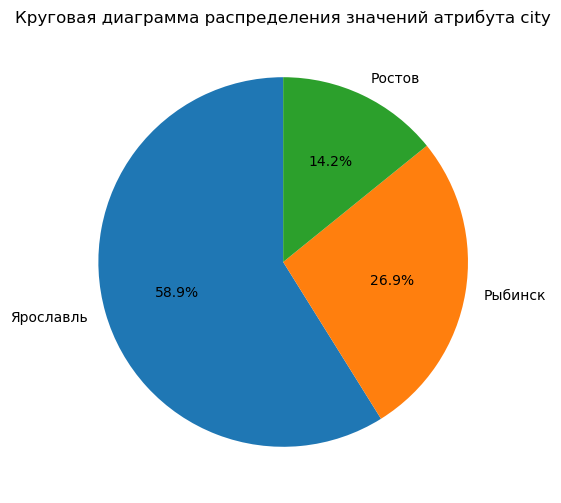

----------------------------------------------------------------------------------------------------------
Атрибут: gender
Количество уникальных значений: 2
Уникальные значения: ['Ж' 'М']


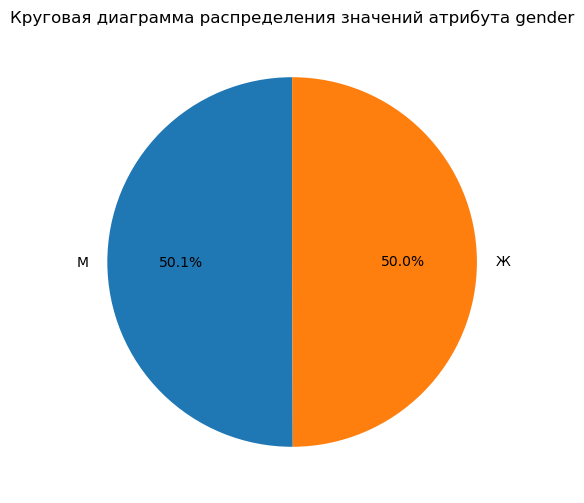

----------------------------------------------------------------------------------------------------------
Атрибут age имеет слишком большую вариативность: хранит количественные значения или категорий слишком много.
----------------------------------------------------------------------------------------------------------
Атрибут: equity
Количество уникальных значений: 10
Уникальные значения: [1 5 0 4 3 2 6 7 8 9]


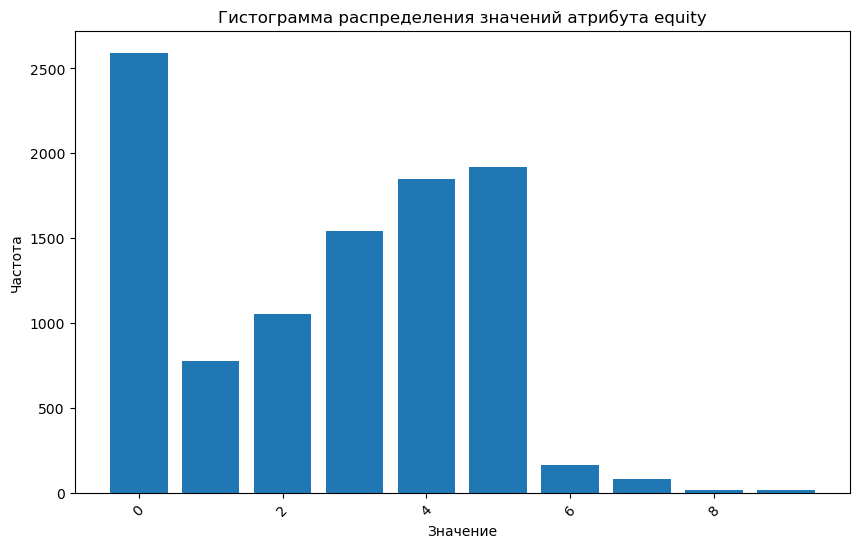

----------------------------------------------------------------------------------------------------------
Атрибут balance имеет слишком большую вариативность: хранит количественные значения или категорий слишком много.
----------------------------------------------------------------------------------------------------------
Атрибут: products
Количество уникальных значений: 6
Уникальные значения: [2 3 1 4 5 0]


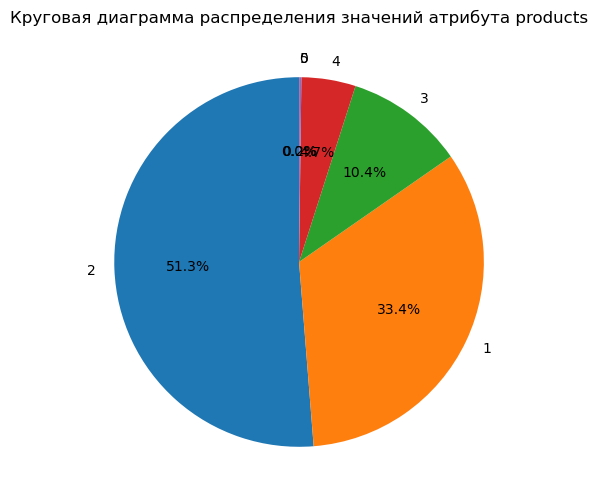

----------------------------------------------------------------------------------------------------------
Атрибут: credit_card
Количество уникальных значений: 2
Уникальные значения: [0 1]


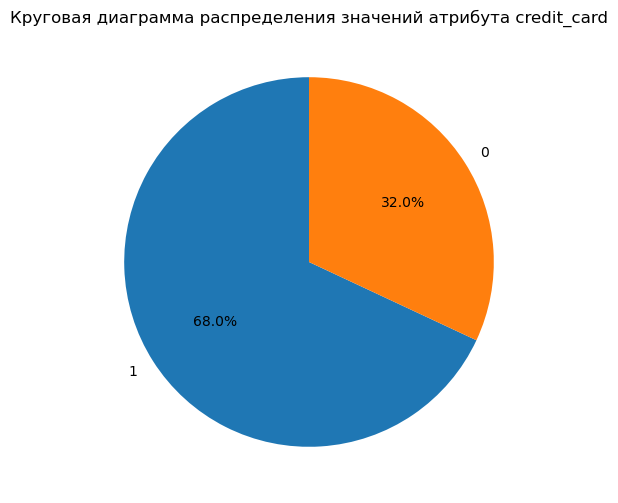

----------------------------------------------------------------------------------------------------------
Атрибут: last_activity
Количество уникальных значений: 2
Уникальные значения: [1 0]


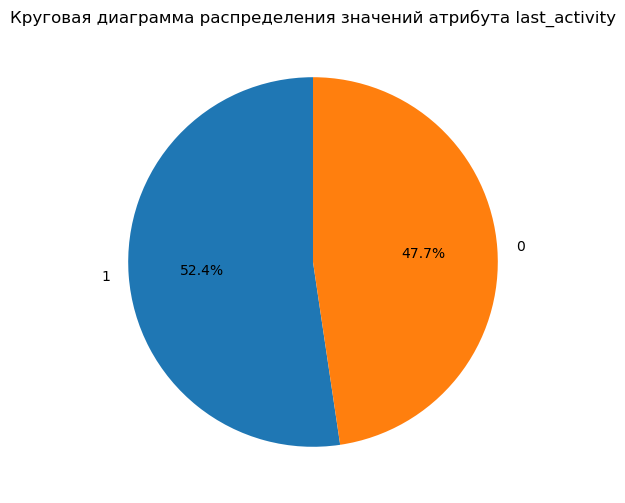

----------------------------------------------------------------------------------------------------------
Атрибут EST_SALARY имеет слишком большую вариативность: хранит количественные значения или категорий слишком много.
----------------------------------------------------------------------------------------------------------
Атрибут: churn
Количество уникальных значений: 2
Уникальные значения: [1 0]


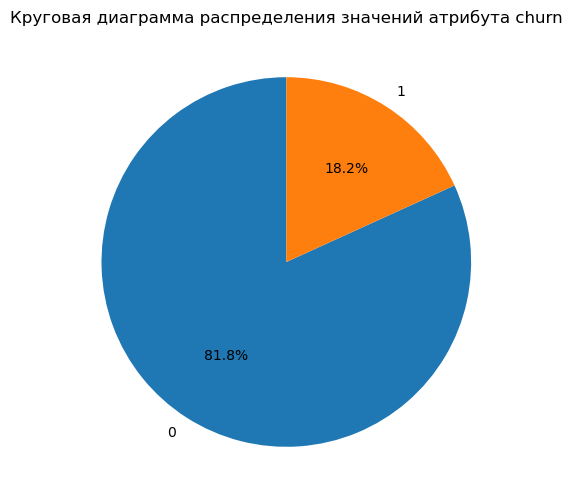

----------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [6]:
plot_distribution(df)

- USERID — идентификатор пользователя, тип - int64 (целочисленный), подобран корректный тип данных для данного атрибута - данные категориальные - номинальные;

- score — баллы кредитного скоринга, хранит количественные значения, тип данных  следует поменять с float на int, т.к. все значения являются дискретными предположительно, данные количественные - дискретные;

- city — город, тип - object, подобран корректный тип данных для данного атрибута, данные категориальные - номинальные, количество уникальных значений - 3: ['Рыбинск' 'Ярославль' 'Ростов'], большая часть клиентов приходится на Ярославль(~58.9%);

- gender — пол, тип - object, подобран корректный тип данных для данного атрибута, данные категориальные - номинальные (хотя можно превратить в булевые), распредение примерно 50 на 50;

- age — возраст, тип - float, хранит количественные значения, тип данных  следует поменять с float на int , т.к. все значения являются дискретными, данные количественные - дискретные, распределение признака узнаем позже;

- equity — количество баллов собственности, тип - int64 (целочисленный), подобран корректный тип данных для данного атрибута - данные количественные - дискретные, количество уникальных значений - 10:[от нуля до 9-и];

- balance — баланс на счёте, тип - float, подобран корректный тип данных для данного атрибута, данные количественные - непрерывные;

- products — количество продуктов, которыми пользуется клиент, тип - int64, подобран корректный тип данных для данного атрибута, данные количественные - дискретные, количество уникальных значений - 6: [от нуля до 5-и], больше половины клиентов имеют 2 продукта (51.3%), примерно 33.4% - один продукт;

- credit_card — есть ли кредитная карта, тип - int64 (целочисленный), подобран не корректный тип данных для данного атрибута - данные категориальные - булевые, тип изменим на bool, 68% клиентов имеют кредитную карту;

- last_activity — активный клиент, тип - int64 (целочисленный), подобран не корректный тип данных для данного атрибута - данные категориальные - булевые, тип изменим на bool, более 52% клиентов являются активными;

- EST_SALARY — оценочный доход клиента, тип - float, подобран корректно;

- сhurn — признак оттока, тип - int64 (целочисленный), подобран не корректный тип данных для данного атрибута - данные категориальные - булевые, тип изменим на bool, 18.2% клиентов являются отточными. 





Изменения, которые нужно внести:

- credit_card, last_activity, churn: изменить тип данных с int64 на bool.

- score, age: изменить тип данных с float на int.

- привести названия атрибутов к единому стилю.


Дополнительно:

- gender: Можно преобразовать в булевые значения.

Более детально ознакомимся с данными, используя функцию которая покажет нам количество и долю дубликатов:

In [7]:
def duplicated_sum(dataframes, names):
    for frame, name in zip(dataframes, names):
        duplicated_count = frame.duplicated().sum()
        print(f'\033[1m' + 'Количество дубликатов в таблице ' + name + ':' + '\033[0m', duplicated_count)
        temp = frame.copy()
        list_c = list(temp.columns)
        for col_l in list_c:
            print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
                  ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%')
            print('-'* 25)
        display(pd.DataFrame(round(frame.isna().mean()*100, 2)).style.background_gradient('coolwarm'))
        display(frame.info())
        display(frame.head(5))
        print()

Используем этот скрипт для нашего датафрейма

In [8]:
duplicated_sum([df], ['df'])

Количество дубликатов в таблице df: 0
USERID : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
score : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
city : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
gender : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
age : кол-во NaN 26 , процент NaN 0.26 %
-------------------------
equity : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
balance : кол-во NaN 2295 , процент NaN 22.95 %
-------------------------
products : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
credit_card : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
last_activity : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
EST_SALARY : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
churn : кол-во NaN 0 , процент NaN 0.0 %
-------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

Явных дубликатов в таблице не обнаружено, пропуски имеются в 2-х столбцах: age (~ 23%), balance (~ 0.26%) - алгоритм работы с ними разберём в следующем этапе, всего записей - 10000.

Явных дубликатов скрипт не обнаружил, но всё же стоит проверить дубликаты по атрибуту идентификатора клиента:

In [9]:
df['USERID'].duplicated().sum()

73

Идентификаторы дублируются - проблема найдена, логику разрешение отразим в следующем этапе. 

**Промежуточный итог/Итог 1-го пункта:**


Мы ознакомились с нашими данными: структурой, каждым атрибутом в отдельности, распределением значений в атрибутах, выявили критические проблемы.

Обязательные изменения, которые нужно внести на следующем этапе:

- пропуски имеются в 2-х столбцах: age (~ 23%), balance (~ 0.26%), необходимо обработать их.

- credit_card, last_activity, churn: изменить тип данных с int64 на bool.

- score, age:  изменить тип данных с float на int.

- привести названия атрибутов к единому стилю.

- после обработки пропусков необходимо разрешить проблему не явными дубликатами по идентификатору пользователя.

## Подготовка/Предобработка данных
<a id="2"></a>

Все найденные проблемы на этапе первичного ознакомления мы решим в данном пункте.

1) Первоочерёдно разберёмся с пропусками в атрибутах, так как их наличие усложняет работу с преобразованием типов данных, а в нашем случае как раз есть такой атрибут с пропусками, тип данных которого следует заменить: конкретно атрибут 'age' имеет пропуски.

Классификация пропусков (анализ природы пропусков и их разумная обработка): определим вид пропусков и обработаем их, воспользовавшись общепринятой классификацией пропусков:
  - MCAR (Missing Completely At Random / Отсутствует совершенно случайно) — пропуски не зависят от переменных и не ведут к систематической ошибке (смещение, bias), но увеличивают случайную ошибку (разброс, variance), можно их отбрасывать или заполнять, т.к. заполнение не повлияет на характер связи между заполняемой переменной и остальными;
  - MAR (Missing At Random / Отсутствует случайно) — в рамках каждой из групп, которая есть в описываемой данными совокупности, распределение пропусков случайно, можно их отбрасывать;
  - MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.
  
Перед обработкой пропусков обязательно выясним, к какому типу они относятся, а также как эти пропуски зависят от имеющихся данных - тогда можно будет выбрать более удачную стратегию работы с ними.

Тут будет проще создать новый признак, принимающий 1, если в наблюдении пропущено значение признака, и 0, если в наблюдении значение признака не пропущено. Далее этот признак использовать :

    - при анализе корреляций: можно построить матрицу корреляций и посмотреть, есть ли зависимость между новым признаком и другими признаками таблицы: наличие сильной зависимости можеть быть признаков зависимости пропусков от каких-то признаков;
    - как столбец сводной таблицы, где по каждому признаку будет посчитана мера центральной тендеции.
    
   Цель такого анализа - найти зависимости пропусков от данных или подтвердить отсутствие таких зависимостей.

Создадим булевые атрибуты которые сообщают о наличии пропусков в столбцах age  и balance, воспользуемся функцией:

In [10]:
def is_pass(df, attribute_with_nulls):
    """
    Добавляет в датафрейм новый столбец, который хранит 1 там, где есть пропуски в указанном атрибуте, и 0 - где пропусков нет.

    Аргументы:
        df: Датафрейм.
        attribute_with_nulls: Название столбца, где есть пропуски (указывается в кавычках).

    Возвращает:
        Датафрейм с добавленным столбцом типа int: .
    """
    df['is_pass_' + attribute_with_nulls] = df[attribute_with_nulls].isna().astype(int)
    return df    

Применим данный скрипт к 2-м атрибутам с пропусками:

In [11]:
df = is_pass(df, 'age')
df = is_pass(df, 'balance')

Далее мы используем эти атрибуты для поиска зависимостей с другими атрибутами датафрейма: для нас важно классифицировать пропуски и выбрать наилучший способ борьбы с ними, для выполнения данной задачи нам поможет матрица диаграмм рассеяния
:

In [12]:
df_only_age_nulls = df.loc[df['is_pass_age'] == 1] # возьмём выборку где пропущен возраст
df_only_balance_nulls = df.loc[df['is_pass_balance'] == 1] # возьмём выборку где пропущен баланс

In [13]:
def one_col_with_all_col_hex_viz(col, df):
    """
    Строит ряд диаграмм рассеяния для заданного столбца с 
    остальными столбцами датафрейма с использованием hexbin-диаграмм.
    Проверяет, что столбец не является категориальным, и пропускает его,
    если это так. Кроме того, отображает диаграмму рассеяния рядом с hexbin-диаграммой.

    Args:
        col: Название целевого столбца.
        df: Датафрейм.
    """
    
    for i in df.columns:  # Цикл проходит по всем атрибутам датафрейма
        if df[i].dtype in ['object', 'category']:  # Проверка на категориальный столбец
            print(f"Столбец '{i}' - категориальный, пропускаем...")  # Если категориальный - сообщает
            continue  # Пропускаем итерацию если столбец категориальный
        if col != i:
            # Создаем подграфики (2 столбца: 1 для HEX, 1 для scatter)
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Размер фигуры
            
            # Построение HEX-диаграммы
            df.plot(x=i, y=col, kind='hexbin', gridsize=20, ax=axes[0], sharex=False, grid=True)
            axes[0].set_title(f'HEX-диаграмма для {col} и {i}')
            
            # Построение диаграммы рассеяния
            axes[1].scatter(df[i], df[col], alpha=0.5)  # Построение рассеяния
            axes[1].set_title(f'Диаграмма рассеяния для {col} и {i}')
            axes[1].set_xlabel(i)
            axes[1].set_ylabel(col)

            plt.tight_layout()  # Автоматически настраивает расстояние между графиками
            plt.show()

Выводим функцию поиска зависимостей для атрибута 'age', но отредактируем столбцы датафрейма - исключим атрибут 'userid' - данная визуализации не принесёт пользы для исследования:

In [14]:
df_only_age_nulls = df_only_age_nulls.drop(['USERID'], axis=1)

Вывод функции:

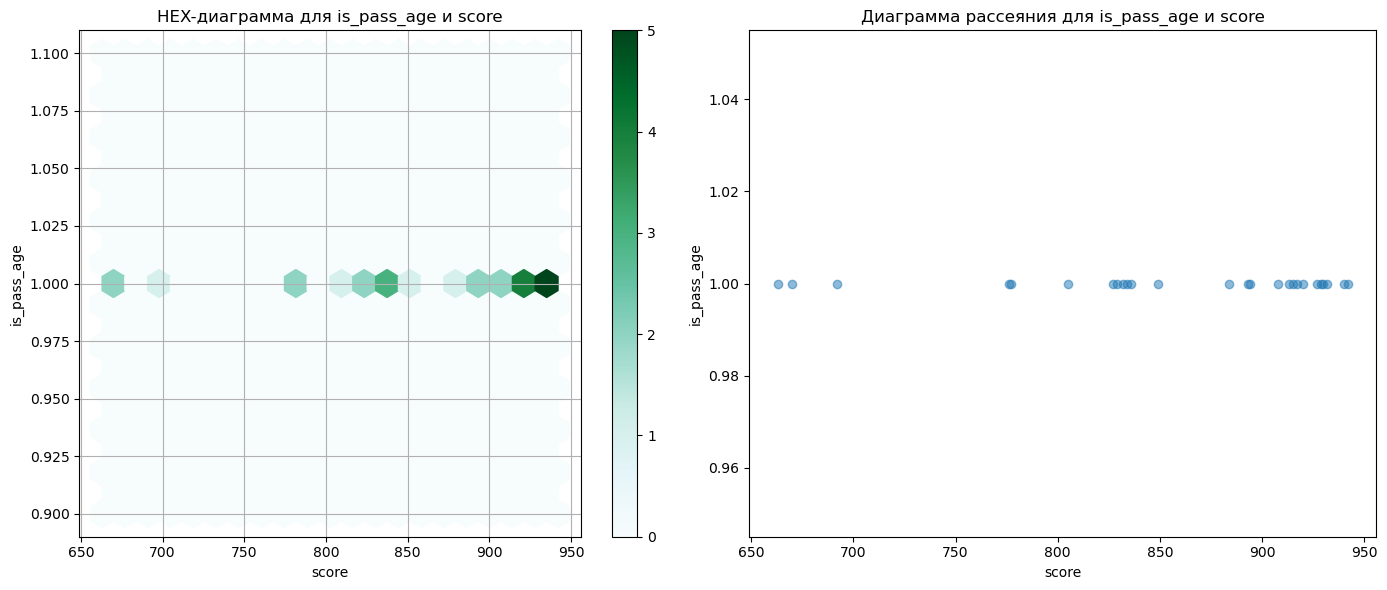

Столбец 'city' - категориальный, пропускаем...
Столбец 'gender' - категориальный, пропускаем...


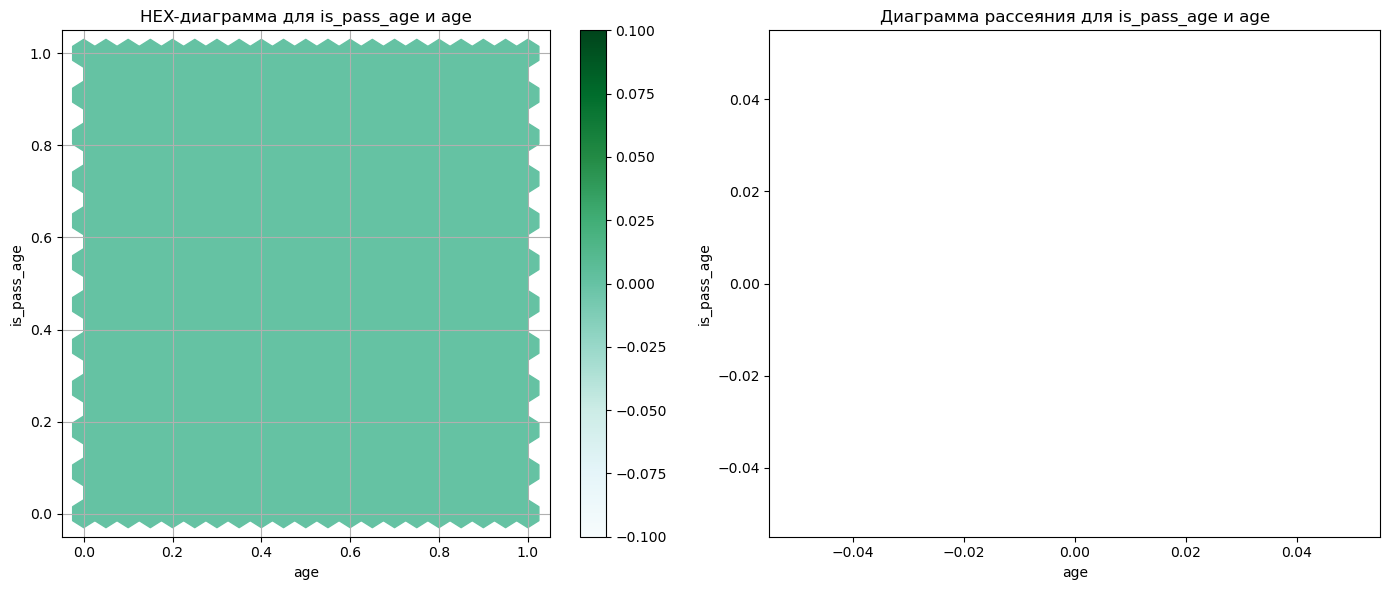

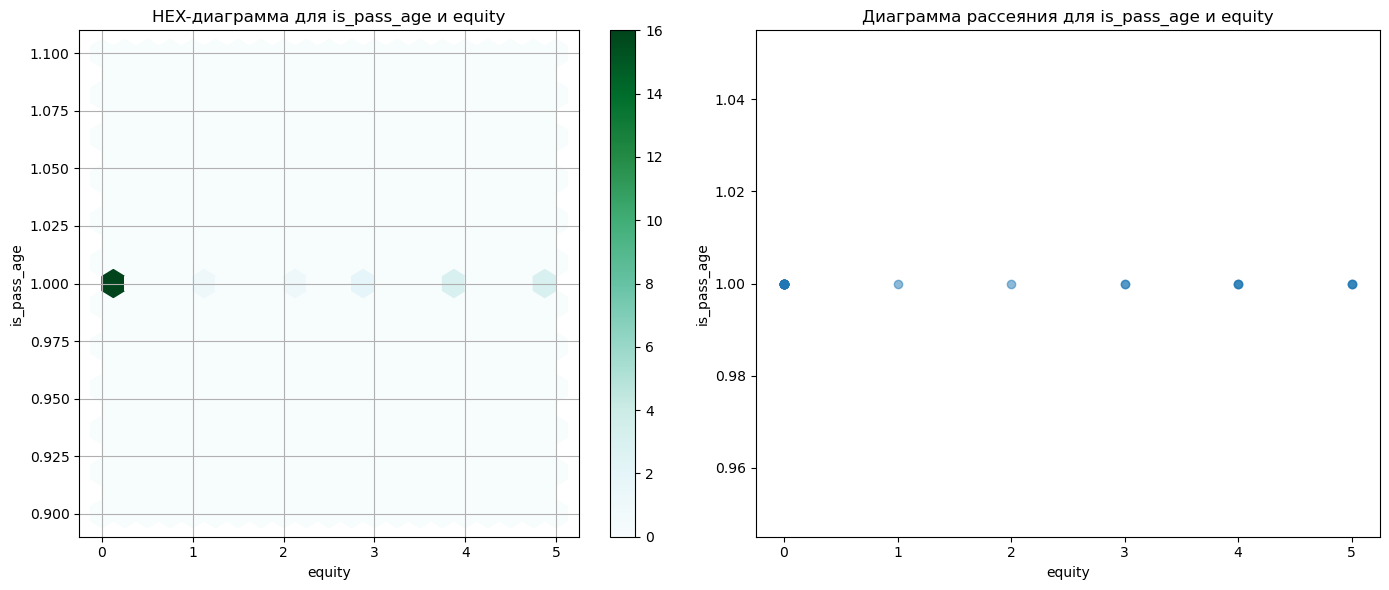

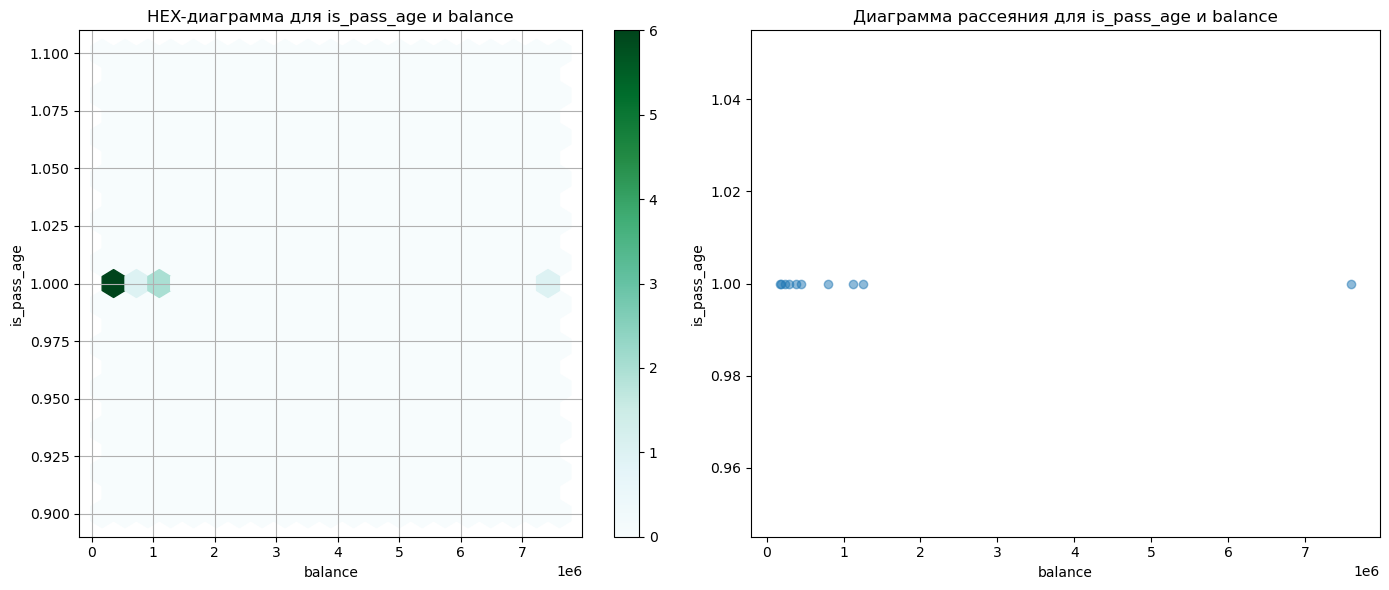

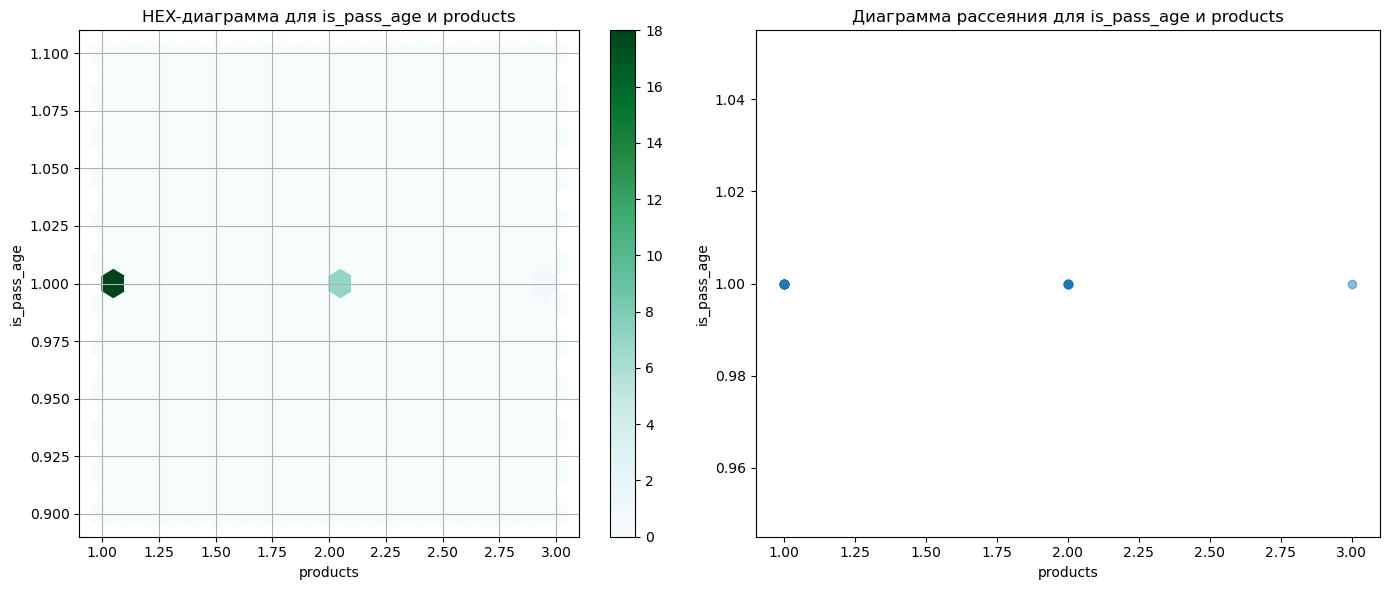

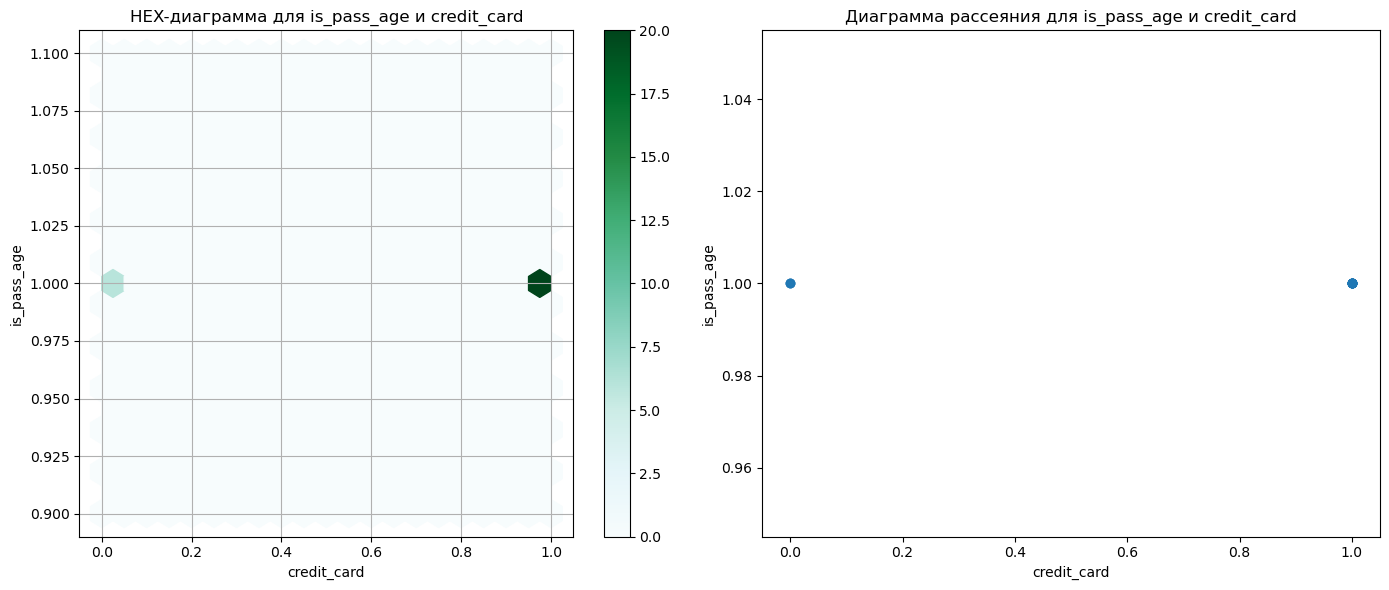

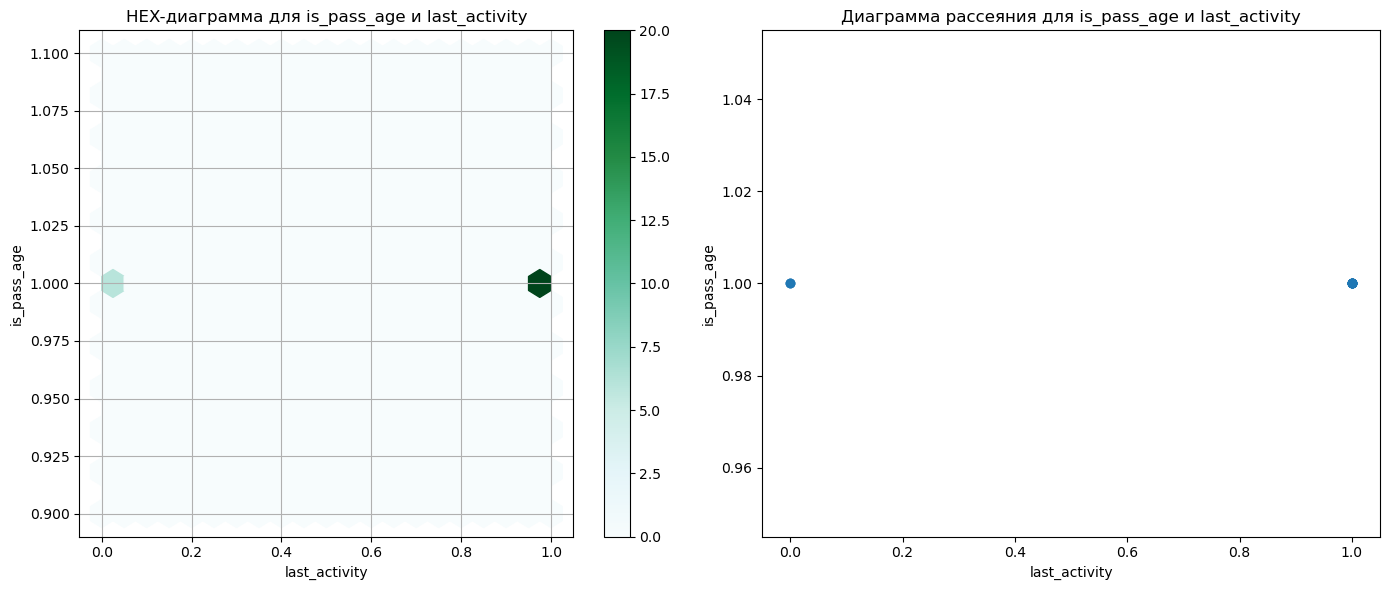

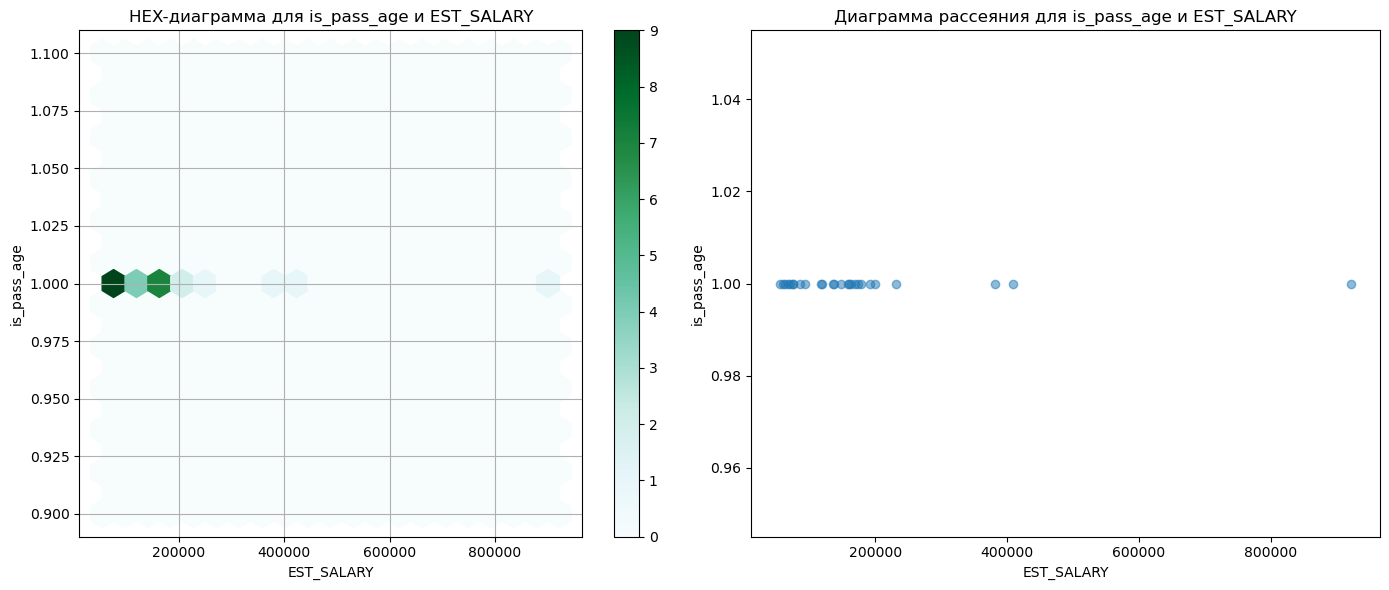

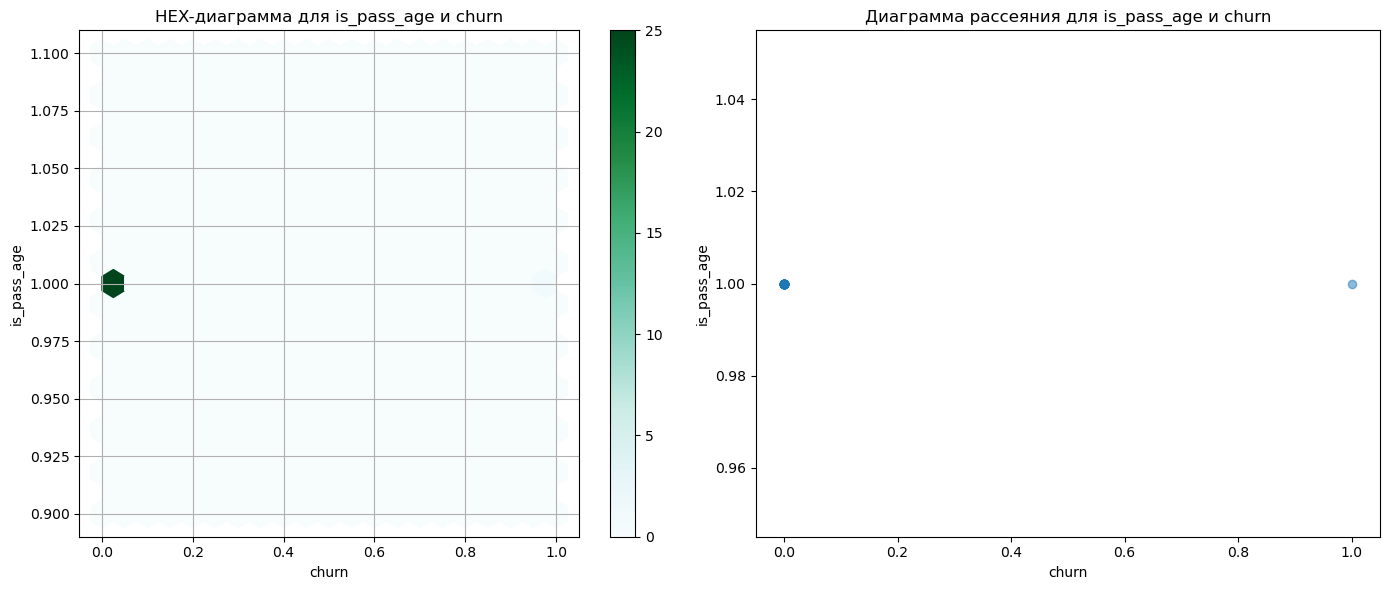

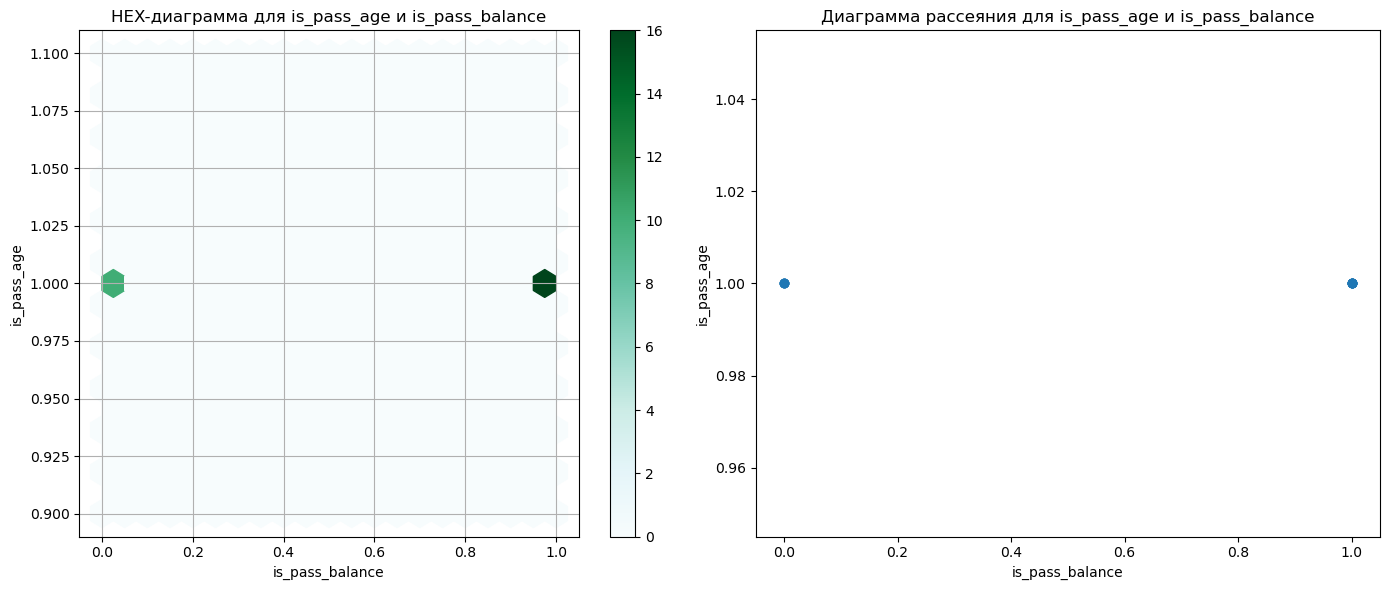

In [15]:
one_col_with_all_col_hex_viz('is_pass_age', df_only_age_nulls)

Когда отдельные точки на графике не имеют большого значения, можно использовать HEX-диаграмму для визуализации данных. Принцип работы такого графика схож с диаграммой рассеяния, но вместо отображения каждой точки по отдельности, точки, попадающие в одни и те же области, группируются в ячейки шестиугольной сетки. Цвет ячейки отражает количество точек внутри неё: чем темнее цвет, тем больше точек в этой области.

Мы выбрали такой способ визуализации, поскольку он позволяет быстро определить области с высокой плотностью данных. В частности, нас интересуют области с наибольшей концентрацией данных, что может сигнализировать о возможных проблемах с данными — например, большое количество одинаковых значений может указывать на пропуски или другие аномалии в признаках. HEX-диаграмма позволяет легко обнаружить такие "скопления" и помогает в дальнейшем анализе данных. В итоге мы находим ряд возможных аномалий и 'прикидываем' полную картину, размышляем что могло привести к аномалии по составным частям.

К примеру если бы у нас была пропущена категория товара (в вымышленном датафрейме) и оказалось, что у таких товаров примерно одинаковый диапозон цен, габаритов, специализаций и т.д., то мы бы смогли в теории найти записи удовлетворяющие этим условиям и выявить категорию по полным записям, затем заполнить пропуски.


Также рядом с каждой HEX-визуализацией мы расположили аналогичную диаграмму рассеяния, чтобы мы могли детальнее ознакомится с наблюдениями. 

Построим столбчатые диаграммы для категориальных данных:

In [16]:
def one_col_with_all_col_bars(col, df):
    """
    Строим ряд столбчатых диаграмм для категориальных атрибутов выбранного датафрейма

    Args:
        col: Название целевого столбца.
        df: Датафрейм.
    """
    
    for i in df.columns:  # Цикл проходит по всем атрибутам датафрейма
        # Проверяем, если столбец содержит только 0 и 1
        if set(df[i].unique()) == {0, 1}:
            df[i] = df[i].astype('bool')  # Преобразование в булевый тип

        # Проверка на категориальный или булевый столбец
        if df[i].dtype in ['object', 'category', 'bool']:  
            value_counts = df[i].value_counts()
            plt.figure(figsize=(8, 6))  # Устанавливаем размер фигуры
            
            # Устанавливаем один цвет для всех столбцов
            sns.barplot(x=value_counts.index, y=value_counts.values, color='skyblue')  # Построение диаграммы
            plt.title(f'Столбчатая диаграмма для целевого атрибута {col} и {i}')
            plt.xlabel(f'{i}')
            plt.ylabel('Частота')
            
            plt.show()
        else:
            print(f"Столбец '{i}' - не является категориальным, пропускаем...")

Вызовем скрипт для категориальных данных:

Столбец 'score' - не является категориальным, пропускаем...


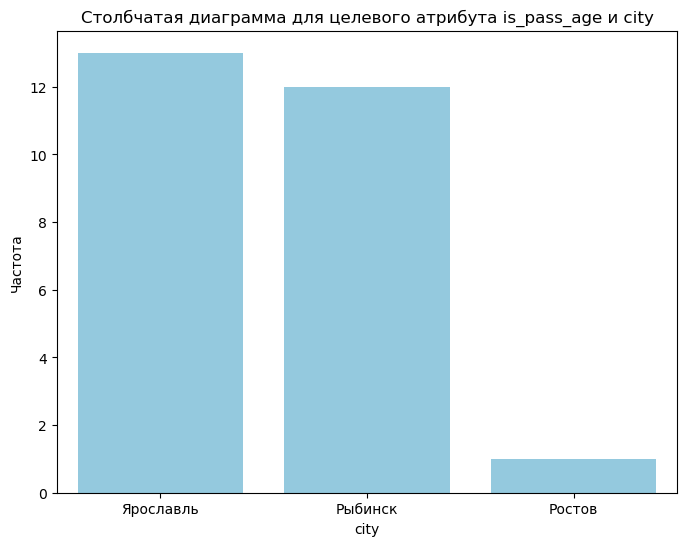

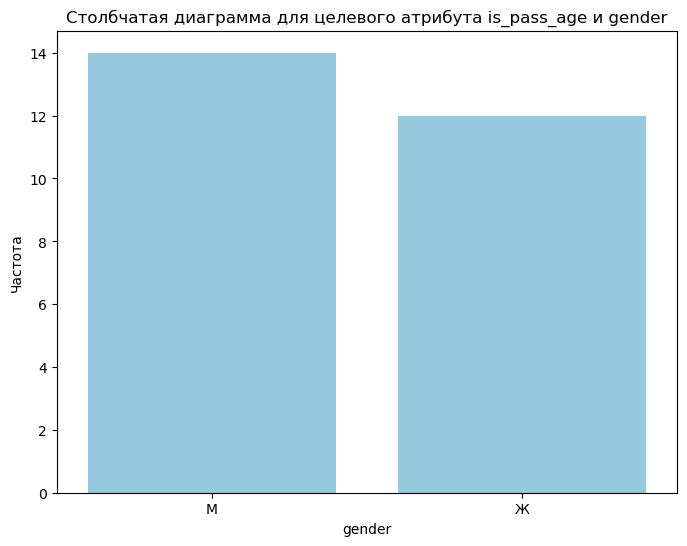

Столбец 'age' - не является категориальным, пропускаем...
Столбец 'equity' - не является категориальным, пропускаем...
Столбец 'balance' - не является категориальным, пропускаем...
Столбец 'products' - не является категориальным, пропускаем...


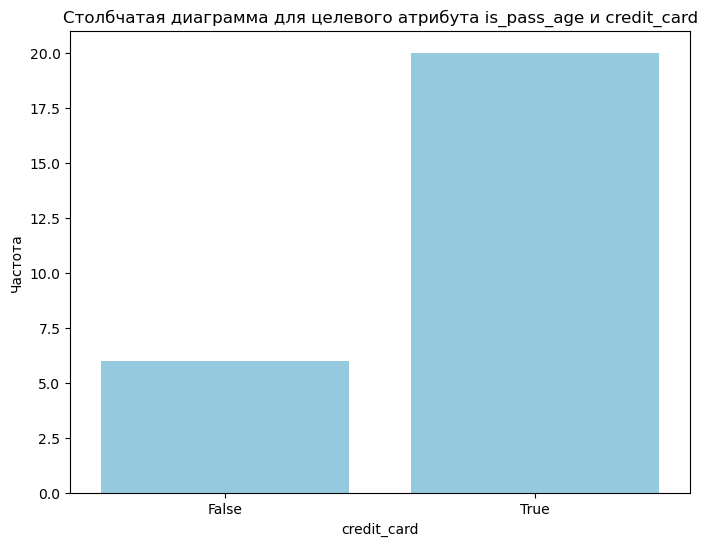

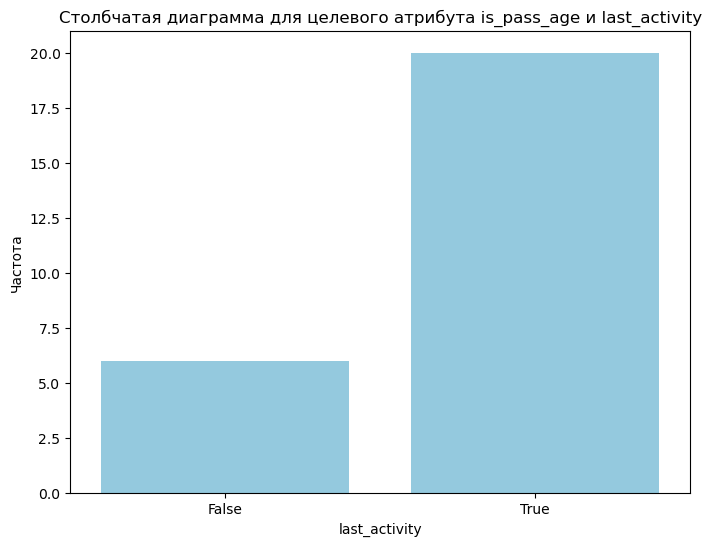

Столбец 'EST_SALARY' - не является категориальным, пропускаем...


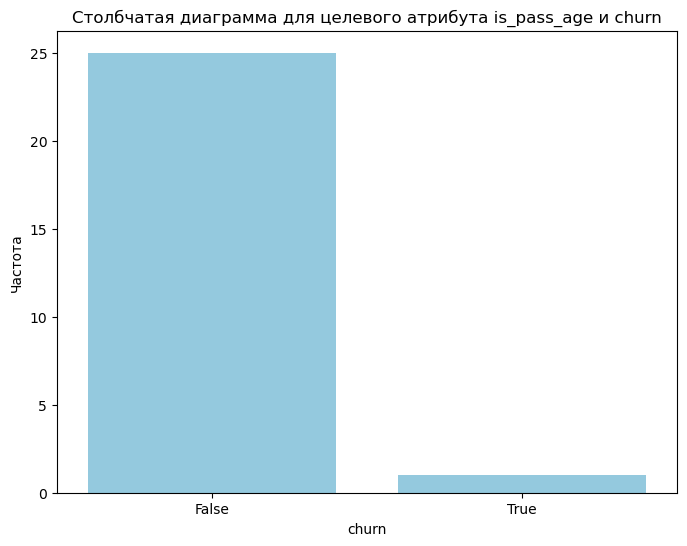

Столбец 'is_pass_age' - не является категориальным, пропускаем...


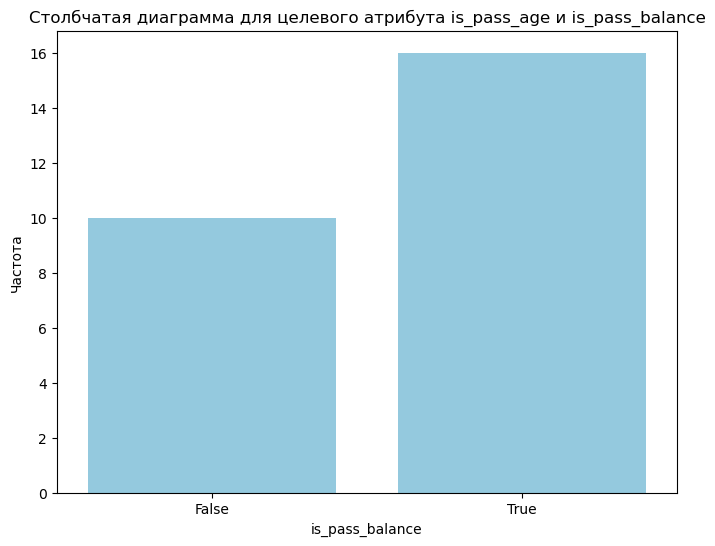

In [17]:
one_col_with_all_col_bars('is_pass_age', df_only_age_nulls)

Явного дизбаланса распределения у категориальных данных нет. Исключение: атрибут оттока клиентов - они практически все являются не ушедшими клиентами.

Проанализировав данный ряд графиков, мы  можем сказать что пропуски в атрибуте 'age'  являются полностью случайными MCAR (Missing Completely At Random / Отсутствует совершенно случайно) потому что: существуют 'скопления' в признаках, но они не показывают явное выделение категорий/диапозонов, т.е. мы не можем сказать что пропуски у нас 'скопились' только в определённом месте признака, поэтому мы не можем конкретно сформировать ряд особенностей присущий только записям с пропусками, а соотвественно сказать что пропуски были не случайны.

Посколько пропуски полностью случайные и их количество не велико, то удалим их.

Алгоритм разрешения проблемы: небольшое количество пропусков - MCAR (Missing Completely At Random / Отсутствует совершенно случайно) мы можем спокойно удалить или создать для них 'заглушку': относительно общего количества данных их мало, удалим. Основная часть пропусков - MNAR (Missing Not At Random / Отсутствует не случайно) мы можем удалить в контексте данной задачи, потому что такие клиенты являются клиентами только формально и в скором времени с большой вероятностью станут ушедшими. Относительная потеря данных составит менее 1% (0.26% если точно), приемлимо (приемлимый уровень потери составляет не более 5% данных).

Удалим записи с пропущенным возрастом:

In [18]:
df = df.loc[df['age'].isna() == False]

Вывовем функцию поиска зависимостей для атрибута 'balance':

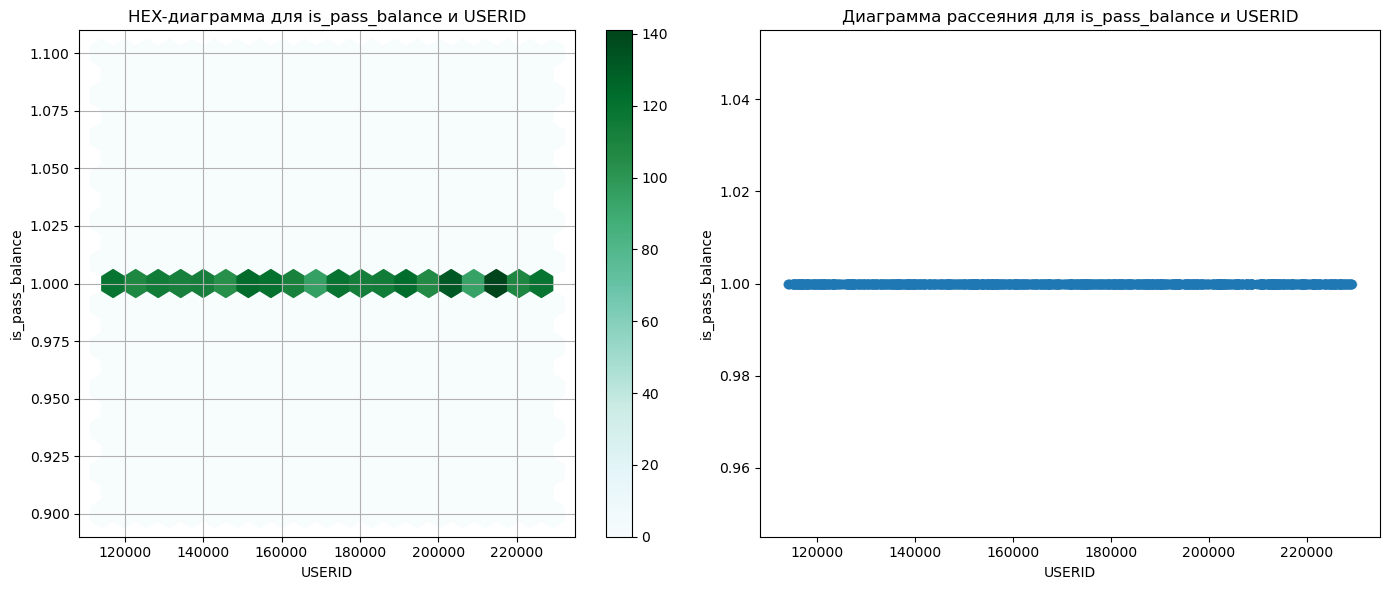

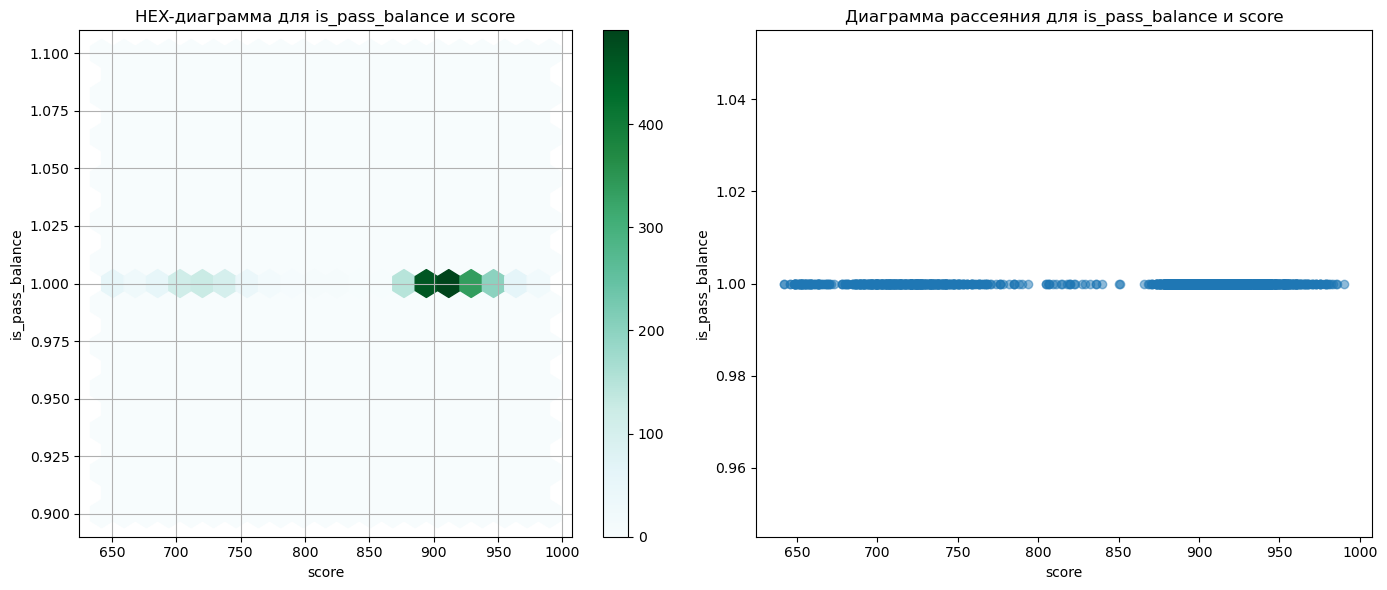

Столбец 'city' - категориальный, пропускаем...
Столбец 'gender' - категориальный, пропускаем...


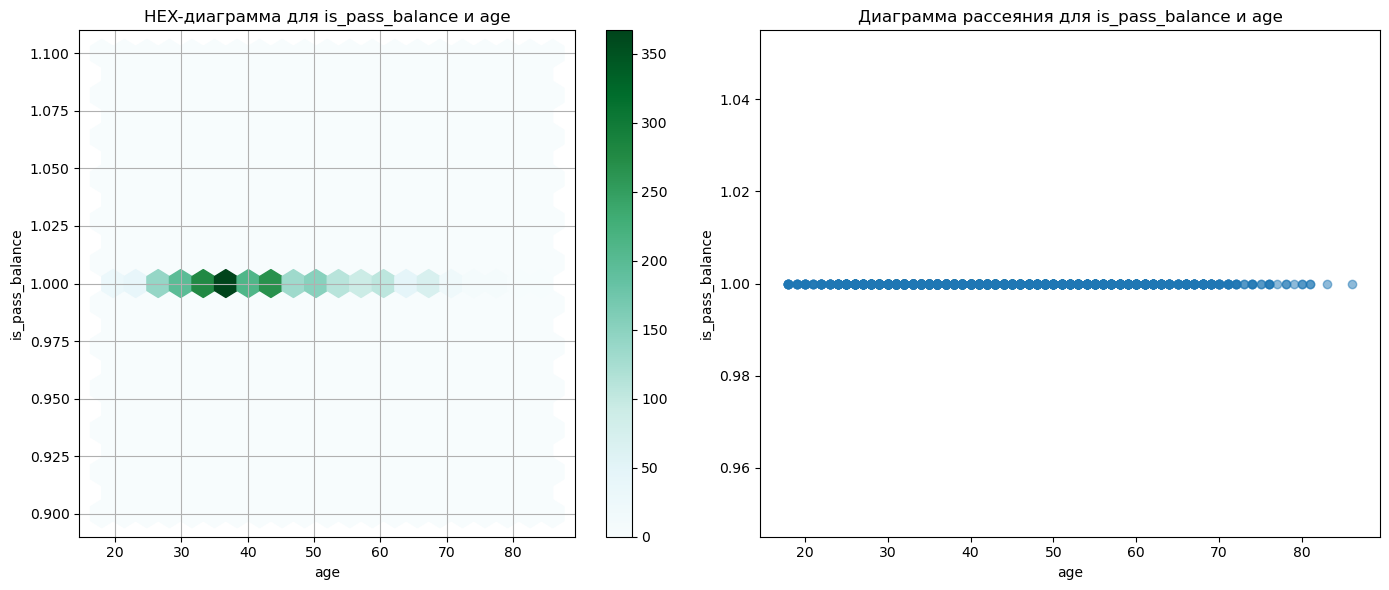

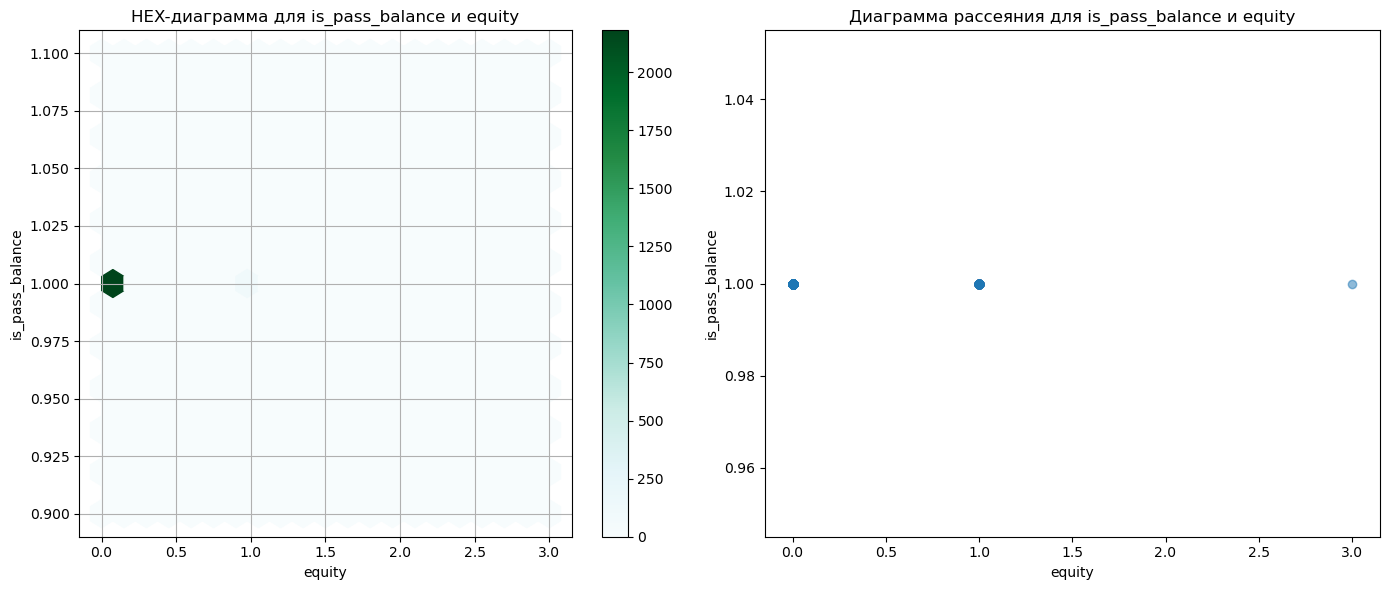

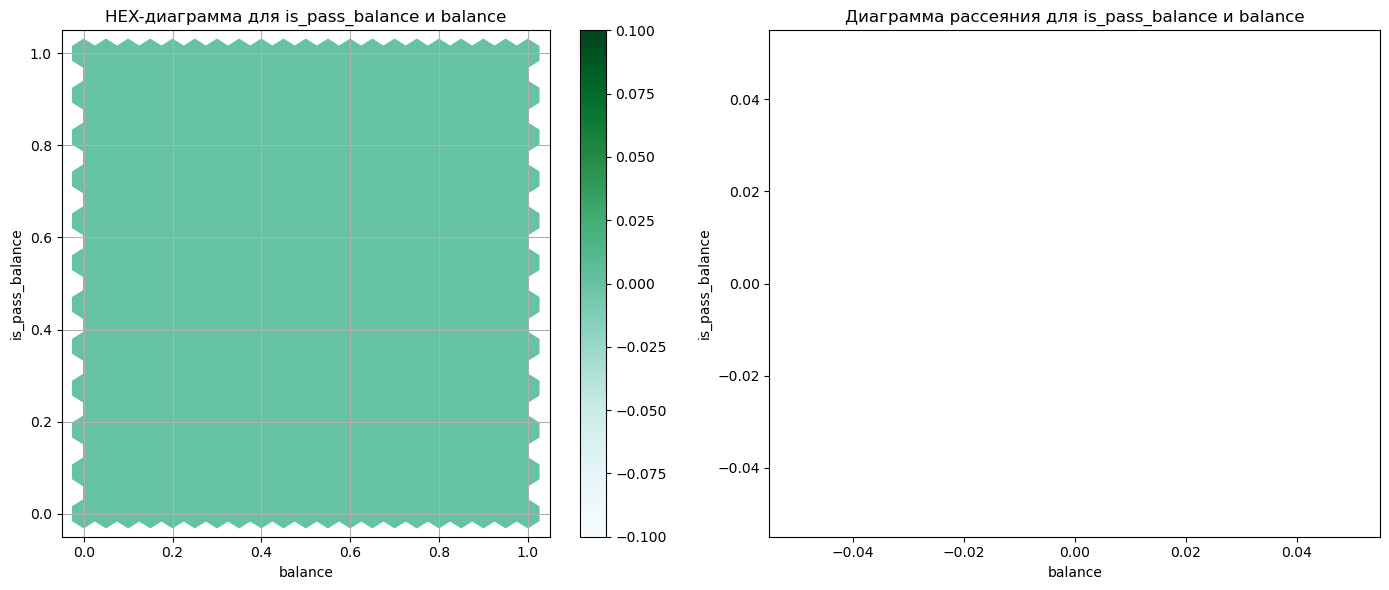

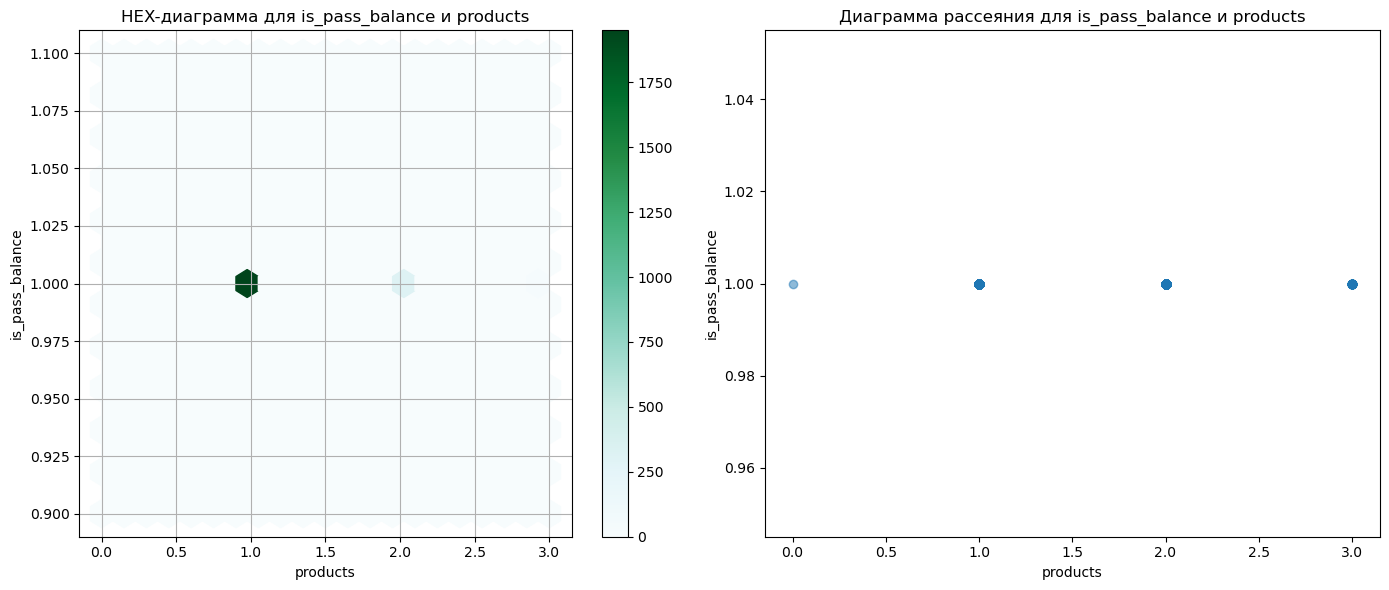

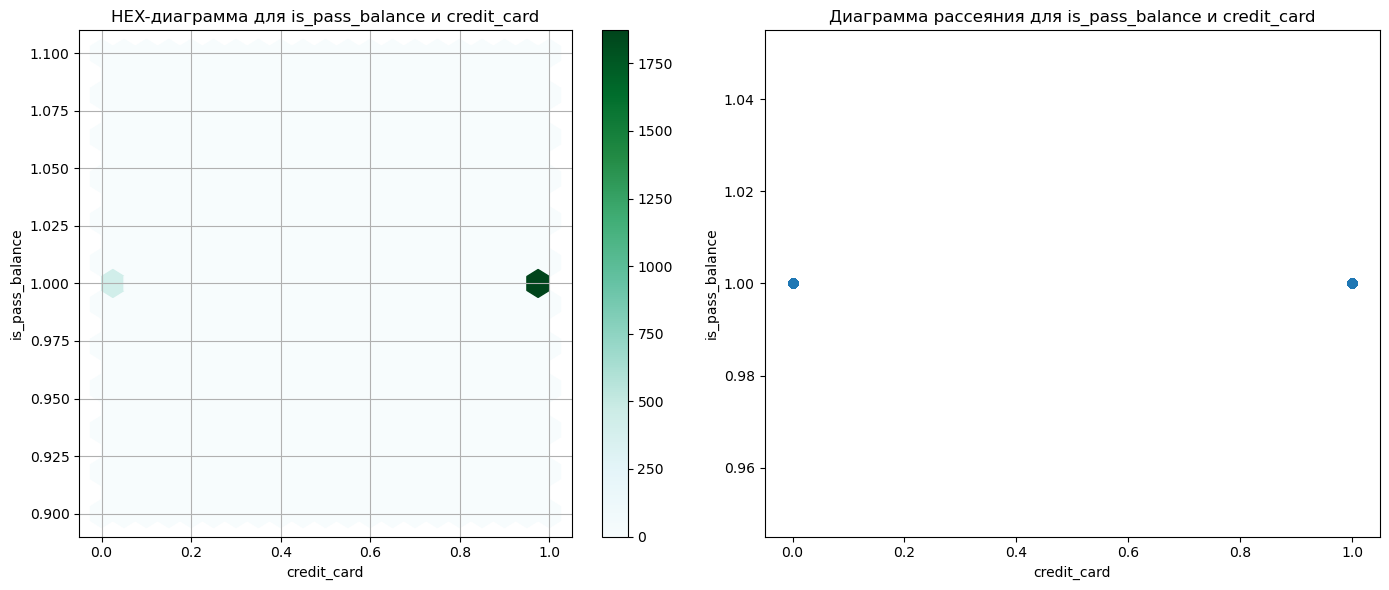

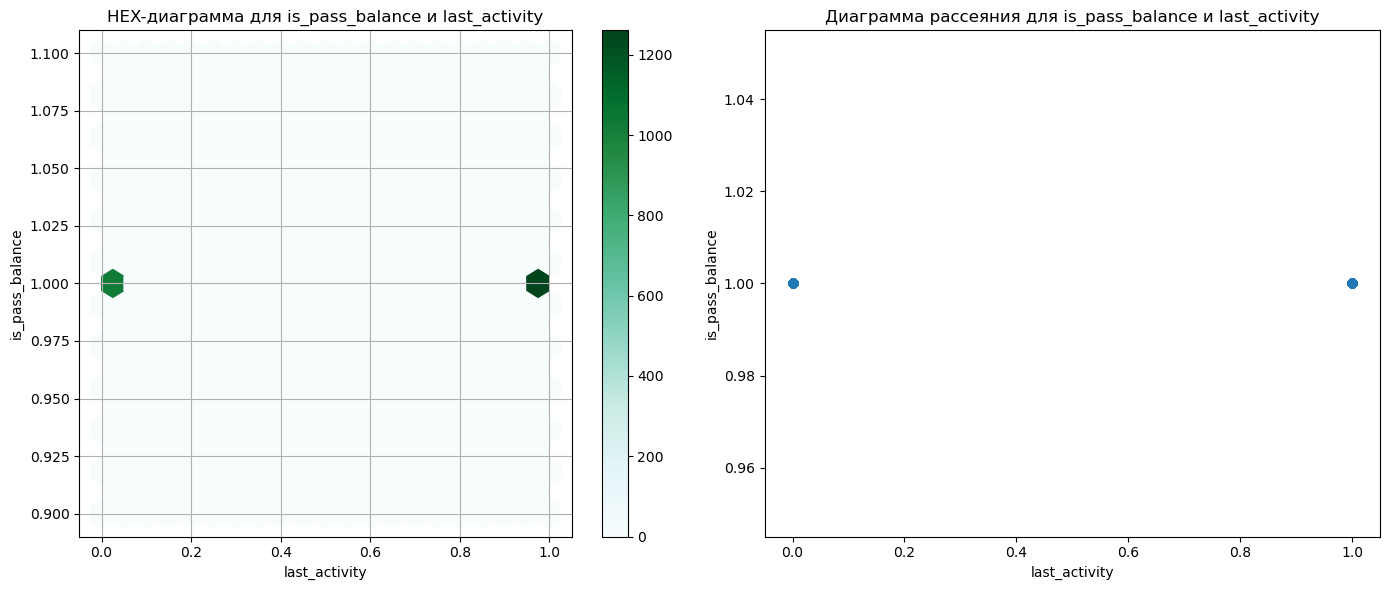

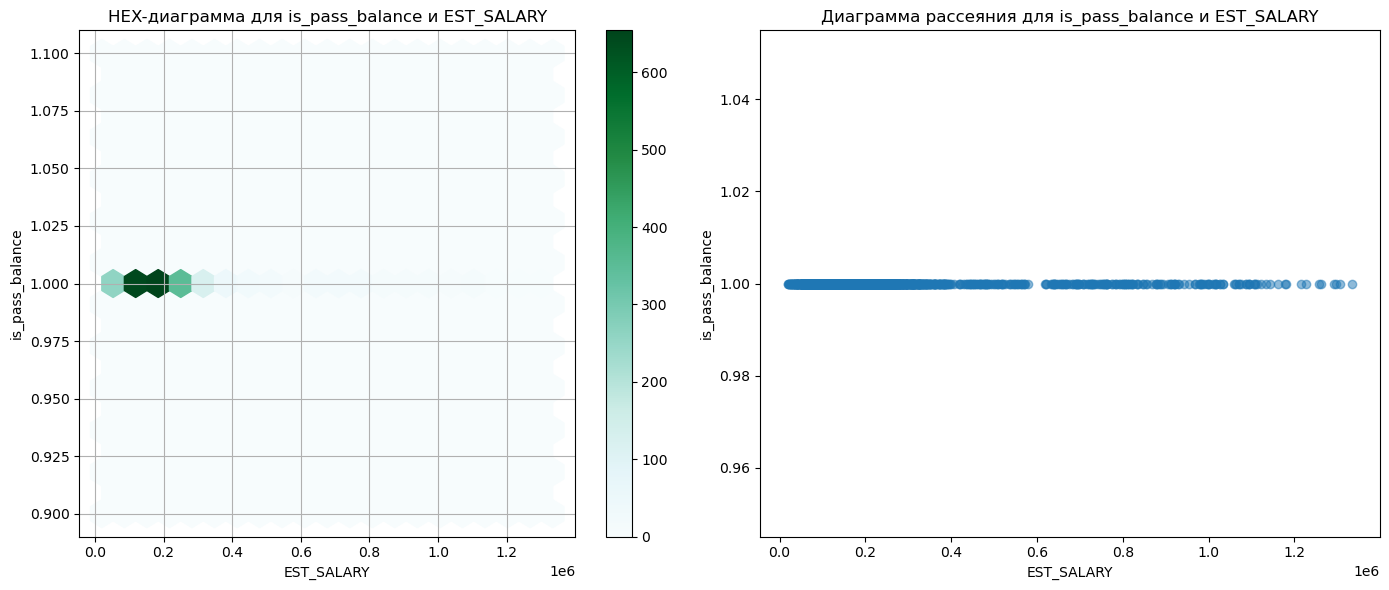

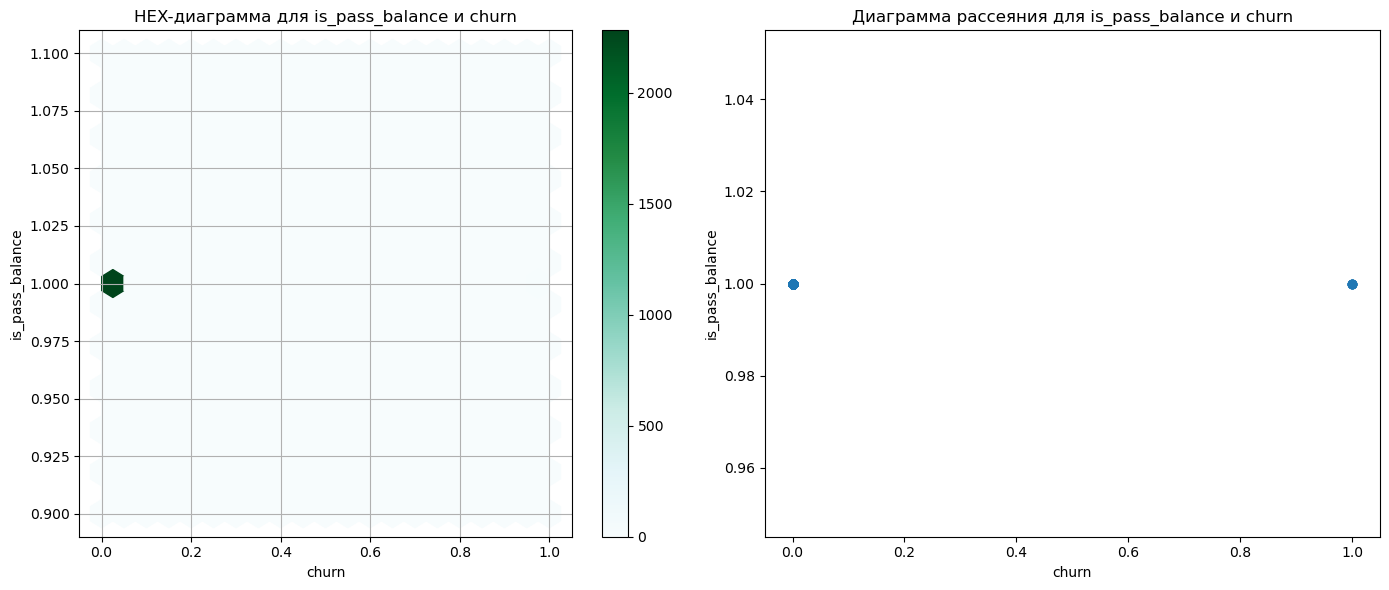

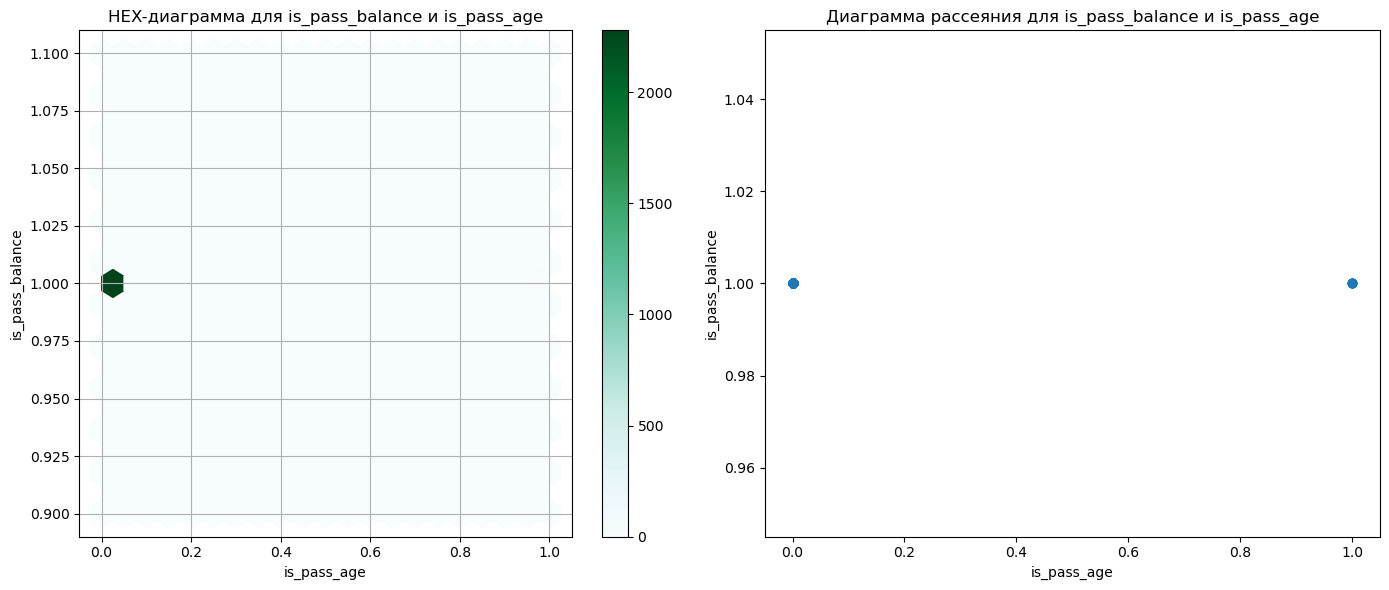

In [19]:
one_col_with_all_col_hex_viz('is_pass_balance', df_only_balance_nulls)

Ознакомимся с описательными статистиками этого столбца (по всем данным, не по выборке): цель - посмотреть могут ли быть отрицательные балансы. Если клиент имеет только кредитную карту и он только пока что тратил с неё деньги, то баланс по идее должен быть отрицательным, а если такого не происходит, то значит под балансом подразумеваются только собственные финансы клиента, финансы которые банк предоставляет на кредитные продукт не отслеживается. При возможности следует уточнить этот момент у дата-инженеров.

In [20]:
# Установим более читаемый формат вывода
pd.options.display.float_format = '{:.2f}'.format

df['balance'].describe()

count        7695.00
mean       827245.59
std       1980327.41
min             0.00
25%        295698.71
50%        524295.33
75%        980051.21
max     119113552.01
Name: balance, dtype: float64

Визуализации показали что у многих таких клиентов выоский бал кредитного скоринга, у них преимущественно один продукт - кредитная карта, часть из них - не являются активными клиентами.

В данном атрибуте часть пропусков является неслучайной - MNAR (Missing Not At Random / Отсутствует не случайно). Такие пропуски встречаются у клиентов с одним продуктом которым является кредитная карта: в базе хранятся только собственные финансы клиента, поэтому пропуски у таких клиентов (с одним продуктом - кредитной картой) не фигурируют, проводить манипуляции с такими пропусками не желательно.

Заменим пропуски у клиентов с одним продуктом - кредиткой на -1: создадим 'заглушку':

Мы постарались добиться максимального сохранения данных с адекватной аргументацией замен в MNAR - пропусках атрибута баланса, далее заменять или пытаться как-то избавиться от пропусков в этом атрибуте мы продолжать не будем. Пропуски здесь  не случайны, но найти ещё одну или более адекватных причин при имеющихся на этот момент данных очень сложно, а вероятность ошибки - велика. В целом, не случайные пропуски необходимо обрабатывать очень аккуратно, что мы и сделали. В ходе дальнейшей работы мы будем осознавать особенности замен пропусков и аккуратно использовать данные.

2) credit_card, last_activity, churn: изменить тип данных с int64 на bool.

In [21]:
df['credit_card'] = df['credit_card'].astype('bool') # меняем тип данных атрибута 'credit_card' на булевый
df['last_activity'] = df['last_activity'].astype('bool') # меняем тип данных атрибута 'last_activity' на булевый
df['churn'] = df['churn'].astype('bool') # меняем тип данных атрибута 'churn' на булевый

3) score, age:  изменить тип данных с float на int.

In [22]:
df['score'] = df['score'].astype('int64') # меняем тип данных атрибута 'score' на целочисленный
df['age'] = df['age'].astype('int64') # меняем тип данных атрибута 'age' на целочисленный

4) приведение названия атрибутов к единому стилю.

Используем для решения данной задачи функцию для приведения к единому стилю:

In [23]:
# Функция для приведения названий атрибутов к единому стилю
def snake_style(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')

Применяем к нашему датафрейму:

In [24]:
snake_style(df)

5) после обработки пропусков необходимо разрешить проблему с не явными дубликатами по идентификатору пользователя.

In [25]:
print(f'{df["userid"].duplicated().sum()} - количество дубликатов в датафрейме по userid')

50 - количество дубликатов в датафрейме по userid


Взлянем на небольшую часть таких дубликатов:

In [26]:
df.loc[df.duplicated(subset=['userid'], keep=False), :].sort_values(by='userid').head(10)

userid  score       city gender  age  equity    balance  products  \
1893  116540    883    Рыбинск      Ж   55       1  362756.49         3   
7694  116540    887  Ярославль      Ж   38       0        NaN         1   
4866  117943    855    Рыбинск      Ж   32       6 1036832.93         4   
7542  117943    880  Ярославль      Ж   40       0        NaN         1   
5863  120258    908    Рыбинск      Ж   38       4 2213581.63         2   
5896  120258    905  Ярославль      М   30       0        NaN         1   
1411  123461    829  Ярославль      Ж   59       0   96222.44         2   
8638  123461    934    Рыбинск      М   34       0        NaN         2   
9775  124450    758    Рыбинск      Ж   36       0   73574.07         2   
8164  124450    859  Ярославль      Ж   38       6  516811.20         1   

      credit_card  last_activity  est_salary  churn  is_pass_age  \
1893        False           True   175920.48   True            0   
7694        False           True   119247.61  False            0   
4866         True           True   107792.71   True            0   
7542         True          False   137718.93  False            0   
5863        False           True   160327.77   True            0   
5896         True           True   146427.96  False            0   
1411        False           True   102771.55   True            0   
8638         True          False   291619.27  False            0   
9775        False           True    79963.59  False            0   
8164         True           True    95144.63   True            0   

      is_pass_balance  
1893                0  
7694                1  
4866                0  
7542                1  
5863                0  
5896                1  
1411                0  
8638                1  
9775                0  
8164                0

Можно было бы предположить, что клиенты с идентичными номерами являются одним и тем же человеком который переехал, тогда мы бы оставили данные у которых больше возраст клиента, но ознакомление с частью данных показывает что это невозможно: у дубликатов разные полы, попадается уж слишком радикальная разница в возрасте. 

Проверим дубликаты по идентификатору и городу:

In [27]:
print(f'{df[df.duplicated(subset=["userid", "city"], keep=False)].shape[0]} - количество дубликатов в датафрейме по userid и city')

0 - количество дубликатов в датафрейме по userid и city


Таких дубликатов не обнаружено.

Поскольку очень маловероятно что дублирующиеся записи являются представлением одного и того же клиента, а также мы выяснили что дубликатов по идентификатору и городу нет, то удаление таких записей является не целесообразным, потому что вероятнее всего первичным ключом в данном отношении является составной ключ userid + city, также можно заменить что форма Бойса-Кодда соблюдена: 3НФ + ключевые атрибуты составного ключа не зависят от неключевых как условие выполнено.

Почистим датафрейм от ненужных атрибутов:

In [28]:
df = df.drop(['userid', 'is_pass_age', 'is_pass_balance'], axis=1)

6) кодирование (для использования в анализе корреляции):

Мы хотим более широко взглянуть на корреляцию признаков, поэтому консервативные методы поиска корреляции нам не совсем подойдут, так как они предоставляют зависимости только между числовыми признаками, поэтому будем использовать библиотеку phik (с помощью данной библиотеки можно найти корреляцию между категориальными переменными).

Какие есть категориальные кодировщики?
Кодировщики представляют собой некоторое правило перевода категориальных признаков в численные.

Наиболее популярные из них - Label и One-Hot encoder'ы.

Мы будем использовать One-Hot: Главный недостаток One-Hot Encoder'a заключается в существенном увеличении объема данных, так как большие по количеству уникальных значений признаки кодируются большим количеством бинарных признаков, поэтому мы создадим новый датафрейм для безопасности.

Шаги по кодированию:
- Закодируем бинарные переменные, если они ещё не представлены в виде чисел: у нас есть атрибут с полом, можно его перекодировать.
- Применим one-hot кодирование для неупорядоченных категориальных признаков.
- Числовые признаки оставим без изменений.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9974 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score          9974 non-null   int64  
 1   city           9974 non-null   object 
 2   gender         9974 non-null   object 
 3   age            9974 non-null   int64  
 4   equity         9974 non-null   int64  
 5   balance        7695 non-null   float64
 6   products       9974 non-null   int64  
 7   credit_card    9974 non-null   bool   
 8   last_activity  9974 non-null   bool   
 9   est_salary     9974 non-null   float64
 10  churn          9974 non-null   bool   
dtypes: bool(3), float64(2), int64(4), object(2)
memory usage: 730.5+ KB


In [30]:
# Закодируем неупорядоченные категориальные переменные с помощью one-hot encoding
df_encoded = pd.get_dummies(df, columns=['city'])

7) Категоризация признаков является опциональной, поэтому воздержимся от её применения и ограничимся сегментацией клиентов по оттоку. Этого достаточно для нашей работы, к тому же создание дополнительных категорий усложнит интерпретацию корреляции признаков, не добавив значительной ценности в анализ.

**Промежуточный итог Предобработки/Подготовки данных:**

- проблемы которые мы выявили на ознакомительном этапе адекватно разрешены;
- кодирование для использование phik-корреляции выполнено, осталось только построить матрицу корреляций;
- ситуация с дубликатами по идентификатору решена: мы их оставили и аргументировали это тем, что идентификатор + город = составной ключ;
- категоризацию проводить мы не стали, так как это 'утяжелит' матрицу признаков и будто отточных сегментов для анализа вполне достаточно.

## Исследовательский/Разведочный анализ данных (EDA)
<a id="3"></a>

Анализ распределения признаков в разрезе оттока (непрерывные - ищем отточные интервалы, категориальные/дискретные - ищем значения признака с оттоком выше, чем по банку): работаем с атрибутом churn (свидетельствует об уходе клиента), для непрерывных величин строим преимущественно гистограммы и ящики с усами, для дискретных/категориальных столбчатые диаграммы (на этапе выполнения можем воспользоваться иными методами визуализации, но обычно данные диаграммы являются тривиальными подходами так скажем), находим описательные статистики (нас будет интересовать медиана, среднее и мода), сравниваем центральные тенденции оттока в атрибутах и выделяем категории/интервалы с наиболее высоким уровнем оттока:

- непрервные признаки: их мы анализируем, чтобы найти интервалы признака, на которых отток выше, чем лояльность;

- категориальные/дискретные признаки: их мы анализируем, чтобы понять, какое из значений категориального признака более или менее склонно к оттоку.

Работа с непрерывными признаками 'balance' и 'est_salary': Построим ящики с усами для того чтобы изучить распределение и отследить возможные выбросы: 

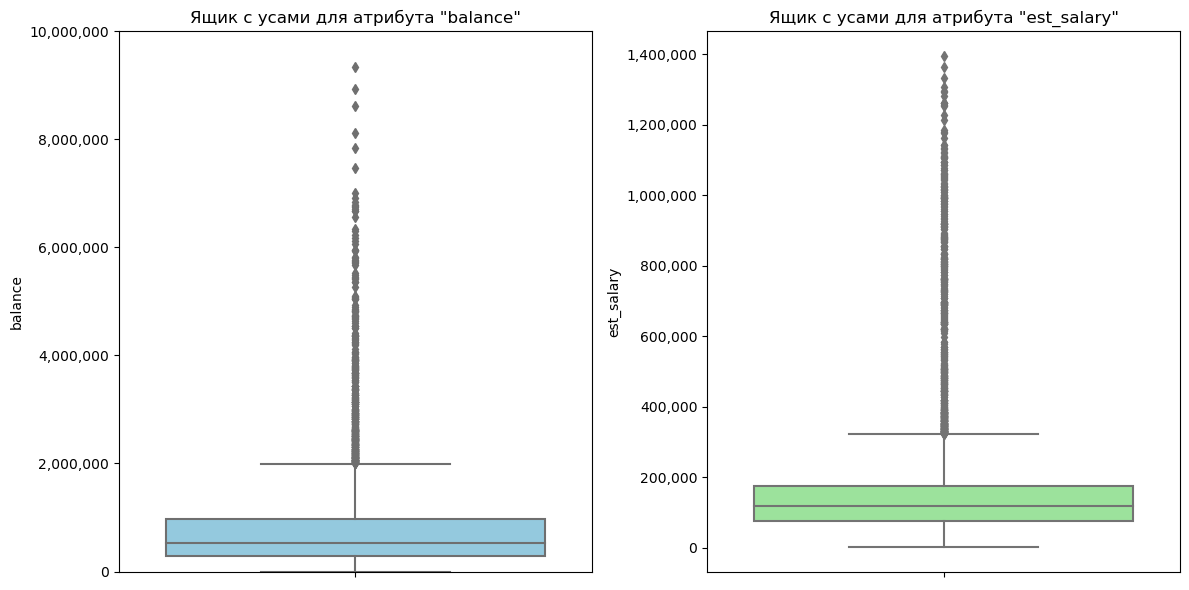

In [31]:
# Создаем фигуру с двумя графиками рядом (1 строка, 2 колонки)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 строка, 2 колонки

# Первый бокс-плот для 'balance'
sns.boxplot(y='balance', data=df, ax=axes[0], color='skyblue')
axes[0].set_ylim(0, 10000000)
axes[0].set_title('Ящик с усами для атрибута "balance"')

# Второй бокс-плот для 'est_salary'
sns.boxplot(y='est_salary', data=df, ax=axes[1], color='lightgreen')
axes[1].set_title('Ящик с усами для атрибута "est_salary"')

# Форматируем оси так, чтобы числа отображались в нормальном формате
for ax in axes:
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Форматирование с запятыми

# Показать графики
plt.tight_layout()  # улучшает компоновку графиков
plt.show()

Можно заметить что существует значительное количество выбросов выше 3-го квартиля в обоих атрибутах, взглянем на количество таких значений:

In [32]:
# Находим 75-й перцентиль (третий квартиль) для столбца атрибутов
third_quartile_est_salary = df['est_salary'].quantile(0.75)
third_quartile_balance = df['balance'].quantile(0.75)

In [33]:
print(f"Доля записей выше 3-го квартиля (возможные выбросы) в 'balance' - \
{df.query('balance > @third_quartile_balance')['balance'].count()/ len(df[~df['balance'].isna()])}")

Доля записей выше 3-го квартиля (возможные выбросы) в 'balance' - 0.25003248862897987


In [34]:
print(f"Доля записей выше 3-го квартиля (возможные выбросы) в 'est_salary' - \
{round(df.query('est_salary > @third_quartile_est_salary')['est_salary'].count()/ len(df), 4)}")

Доля записей выше 3-го квартиля (возможные выбросы) в 'est_salary' - 0.2501


В обоих случаях количество возможных выбросов занимает примерно четверть от всего объёма данных, внушительный разброс по таким атрибутам был вполне ожидаем, избавляться от них мы не станем - это не аномалии (как минимум в большинстве случаев): нужно принять для дальнейший работы эту особенность и использовать методы не чувствительные к выбросам.

Построим гистограммы для этих атрибутов и выявим интервалы, где отток превышает лояльность, т.е. интервалы где доля 1 в 'churn' (обозначет единицой отток) превышает долю нулей (нули обозначают лояльность): 

Сразу обозначим следующее: мы отфильтруем данные атрибута 'balance': до 3-го квартиля и после из-за огромного разброса после 3-го квартиля, чтобы клиентов с выоскими балансами обобщить в один (интервал), а также уберём клиентом которые владеют только кредитками с значениями -1. Отток у этих клиентов мы рассмотрим на круговых диаграммах, потому что они также представляют значительную долю от всех.

In [35]:
df_balance_clear = df.loc[(df['balance'] < third_quartile_balance) & (df['balance'] > 0)]

Строим гистограмму для атрибута 'balance':

In [36]:
# Определяем количество наблюдений
n = len(df_balance_clear)

# Вычисляем количество корзин по формуле Стерженса: k = 1 + log2(n)
num_bins = int(1 + np.log2(n))

# Создаем гистограмму с использованием plotly.express
fig = px.histogram(
    df_balance_clear, 
    x='balance', 
    nbins=num_bins,  # Оптимальное количество корзин
    color='churn',  # Цвет по атрибуту churn
    color_discrete_map={0: 'skyblue', 1: 'salmon'},  # Задаем цвета 
    title='Гистограмма для атрибута "balance" (df_balance_clear)',  
    opacity=0.7,  # Прозрачность
    histnorm='probability',  # Нормализация по вероятности
)

# Настройка осей и наложения столбцов
fig.update_layout(
    barmode='overlay',  # Режим наложения столбцов
    xaxis_title='Баланс',
    yaxis_title='Вероятность',
    legend_title_text='Является оттоком',  
    legend=dict(
        itemsizing='constant',  # Константный размер элементов
    ),
)

fig.show()

Интервалы в которых отток превышает лояльность следующие: 

- 0-50ка;
- 450-550ка;
- 550-650ка;
- 650-750ка;
- 750-850ка.

Посмотрим на обобщённые интервалы: клиенты только с кредиткой и клиенты с относительно высоким балансам по круговой диаграмме:

In [37]:
df_balance_hight_client = df.loc[df['balance'] >= third_quartile_balance]  # Высокобалансные клиенты

# Подсчет количества клиентов по статусу churn для высокобалансных клиентов
high_client_churn_counts = df_balance_hight_client['churn'].value_counts().reset_index()
high_client_churn_counts.columns = ['Status', 'Count']

# Круговая диаграмма для высокобалансных клиентов
fig_high_clients = px.pie(
    high_client_churn_counts, 
    names='Status', 
    values='Count', 
    title='Высокобалансные клиенты по статусу', 
    color_discrete_map={0: 'skyblue', 1: 'salmon'},  # Цвета для статуса
    hole=0.3  # Делаем круговую диаграмму полой
)

# Обновление настройки для отображения легенды и изменения размера
fig_high_clients.update_layout(
    legend_title_text='Отточный клиент',
    legend=dict(x=0.8, y=0.5),  # Позиционирование легенды
    width=400,  # Ширина фигуры
    height=400  # Высота фигуры
)

# Отображение диаграммы
fig_high_clients.show()

Эти обобщённые интервалы имеют лояльность выше оттока.

Итого из 11-и интервалов 5 оказались с преобладанием оттока над лояльностью по балансу:

- 0-50ка;
- 450-550ка;
- 550-650ка;
- 650-750ка;
- 750-850ка.

Обобщим: для удобной сегментации возьмём интервал 450-850ка.

Строим гистограмму для атрибута 'est_salary':

Здесь снова много данных находится за 3-м квартилем: проанализировать их нужно, но зарабатная плата большинства клиентов должна быть адекватно разделена на интервалы, поэтому снова сделаем разрез в данных аналогично предыдущей визуализации:

In [38]:
df_salary_clear = df.loc[df['est_salary'] < third_quartile_est_salary] # атрибут без выбросов
df_salary_hight = df.loc[df['est_salary'] >= third_quartile_est_salary] # обобщённые клиенты с высоким доходом

In [39]:
# Определяем количество наблюдений
n = len(df_salary_clear)

# Вычисляем количество корзин по формуле Стерженса: k = 1 + log2(n)
num_bins = int(1 + np.log2(n))

# Создаем гистограмму 
fig = px.histogram(
    df_salary_clear, 
    x='est_salary',  
    nbins=num_bins,  # Оптимальное количество корзин
    color='churn',  # Цвет по атрибуту churn
    color_discrete_map={0: 'skyblue', 1: 'salmon'},  # Задаем цвета 
    title='Гистограмма для атрибута "est_salary" (df_salary_clear)',  
    opacity=0.7,  # Прозрачность
    histnorm='probability',  # Нормализация по вероятности
)

# Настройка осей
fig.update_layout(
    barmode='overlay',  # Режим наложения столбцов
    xaxis_title='Зарплата',  # Меняем название оси на "Зарплата"
    yaxis_title='Вероятность',
    legend_title_text='Является оттоком',  
    legend=dict(
        itemsizing='constant',  # Константный размер элементов
    ),
)

fig.show()

Строим круговую диаграмму для пользователей с высоким доходом:

In [40]:
# Подсчет количества клиентов по статусу churn для высокозарабатывающих клиентов
salary_high_churn_counts = df_salary_hight['churn'].value_counts().reset_index()
salary_high_churn_counts.columns = ['Status', 'Count']

# Круговая диаграмма для высокозарабатывающих клиентов по статусу churn
fig_salary_high_clients = px.pie(
    salary_high_churn_counts, 
    names='Status', 
    values='Count', 
    title='Клиенты с высокой зарплатой', 
    color_discrete_map={0: 'skyblue', 1: 'salmon'},  # Цвета для статуса
    hole=0.3  # Делаем круговую диаграмму полой
)

# Настройка легенды и размеров
fig_salary_high_clients.update_layout(
    legend_title_text='Являются отточными',
    width=600,  # Ширина фигуры
    height=400,  # Высота фигуры
)

# Отображение диаграммы
fig_salary_high_clients.show()

Итого из 10-и интервалов 4 оказались с преобладанием оттока над лояльностью по балансу:

- 100-120ка;
- 120-140ка;
- 140-160ка;
- 160-180ка.

Можно обобщить что клиенты с зарплатой от 100 до 180 тыс. у.е. склоны уходить из банка.

Строим гистограмму для атрибута 'score':

In [41]:
# Определяем количество наблюдений
n = len(df)

# Вычисляем количество корзин по формуле Стерженса: k = 1 + log2(n)
num_bins = int(1 + np.log2(n))

# Создаем гистограмму 
fig = px.histogram(
    df, 
    x='score',  
    nbins=num_bins,  # Оптимальное количество корзин
    color='churn',  # Цвет по атрибуту churn
    color_discrete_map={0: 'skyblue', 1: 'salmon'},  # Задаем цвета 
    title='Гистограмма для атрибута "score"',  
    opacity=0.7,  # Прозрачность
    histnorm='probability',  # Нормализация по вероятности
)

# Настройка осей
fig.update_layout(
    barmode='overlay',  # Режим наложения столбцов
    xaxis_title='Баллы',  
    yaxis_title='Вероятность',
    legend_title_text='Является оттоком',  
    legend=dict(
        itemsizing='constant',  # Константный размер элементов
    ),
)

fig.show()

Повышенный отток баллов кредитного скоринга заметен на интервале от 800 до 950-и.

Строим гистограмму для атрибута 'age':

In [42]:
# Определяем количество наблюдений
n = len(df)

# Вычисляем количество корзин по формуле Стерженса: k = 1 + log2(n)
num_bins = int(1 + np.log2(n))

# Создаем гистограмму 
fig = px.histogram(
    df, 
    x='age',  
    nbins=num_bins,  # Оптимальное количество корзин
    color='churn',  # Цвет по атрибуту churn
    color_discrete_map={0: 'skyblue', 1: 'salmon'},  # Задаем цвета 
    title='Гистограмма для атрибута "age"',  
    opacity=0.7,  # Прозрачность
    histnorm='probability',  # Нормализация по вероятности
)

# Настройка осей
fig.update_layout(
    barmode='overlay',  # Режим наложения столбцов
    xaxis_title='Возраст',  
    yaxis_title='Вероятность',
    legend_title_text='Является оттоком',  
    legend=dict(
        itemsizing='constant',  # Константный размер элементов
    ),
)

fig.show()

Повышенный отток замечен у клиентов от 25-и до 35-и лет, а также у клиентов от 50-и до 60-и лет, итоговой интервал мы получим после построения ещё одного графика с возрастом.

Далее построим распределение дискретных атрибутов: 'equity' и 'products'.

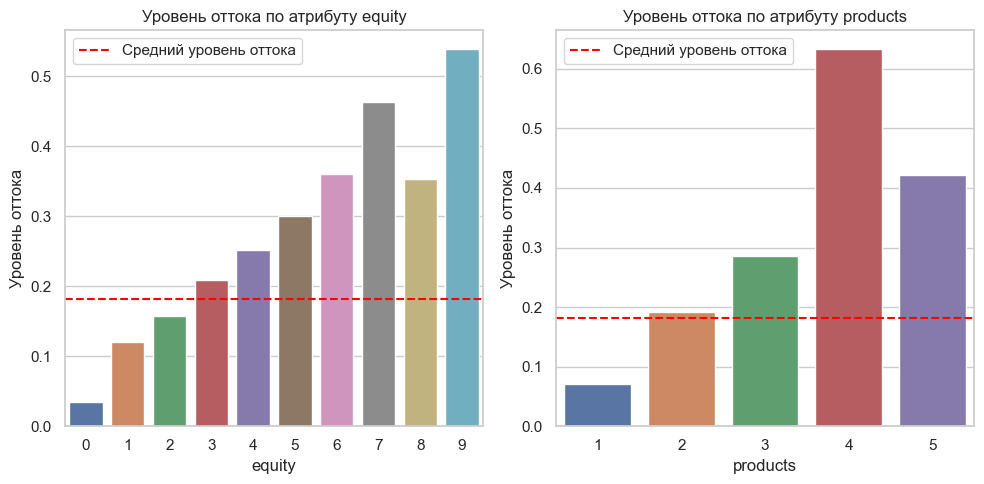

In [43]:
# Создаем список атрибутов для анализа (оставляем только equity и products)
attributes = ['equity', 'products']

# Фильтруем строки, где значение в products не равно 0
df_filtered = df[df['products'] != 0]

# Устанавливаем стиль графиков
sns.set(style="whitegrid")

# Вычисляем средний уровень оттока
mean_churn = df_filtered['churn'].mean()

# Создаем фигуру для графиков
plt.figure(figsize=(10, 5))

# Цикл для построения столбчатых диаграмм
for i, attribute in enumerate(attributes):
    plt.subplot(1, 2, i + 1)  # Разбиваем на 1x2 графика
    sns.barplot(data=df_filtered, x=attribute, y='churn', estimator=lambda x: sum(x) / len(x), ci=None)
    
    # Добавляем линию для среднего уровня оттока
    plt.axhline(mean_churn, color='red', linestyle='--', label='Средний уровень оттока')
    
    # Настройка заголовка и меток осей
    plt.title(f'Уровень оттока по атрибуту {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Уровень оттока')
    plt.legend()

# Настраиваем внешний вид и показываем графики
plt.tight_layout()
plt.show()


Количество баллов собственности которые имеют отток выше среднего: от 3-х до 9-и (включительно), практически линейный рост уровень оттока с увеличением баллов собственности (исключение - 8 баллов). 

Количество продуктов с уровнем оттока выше среднего:  от 3-х до 5-и (включительно), очень высокий отток наблюдается у клиентов с количеством продуктов равным 4-м: примено в 3 раза больше чем средний уровень оттока по банку.

Атрибуты 'score', 'age' - дискретные, но с большой вариативностью, поэтому построим для них гистограммы:

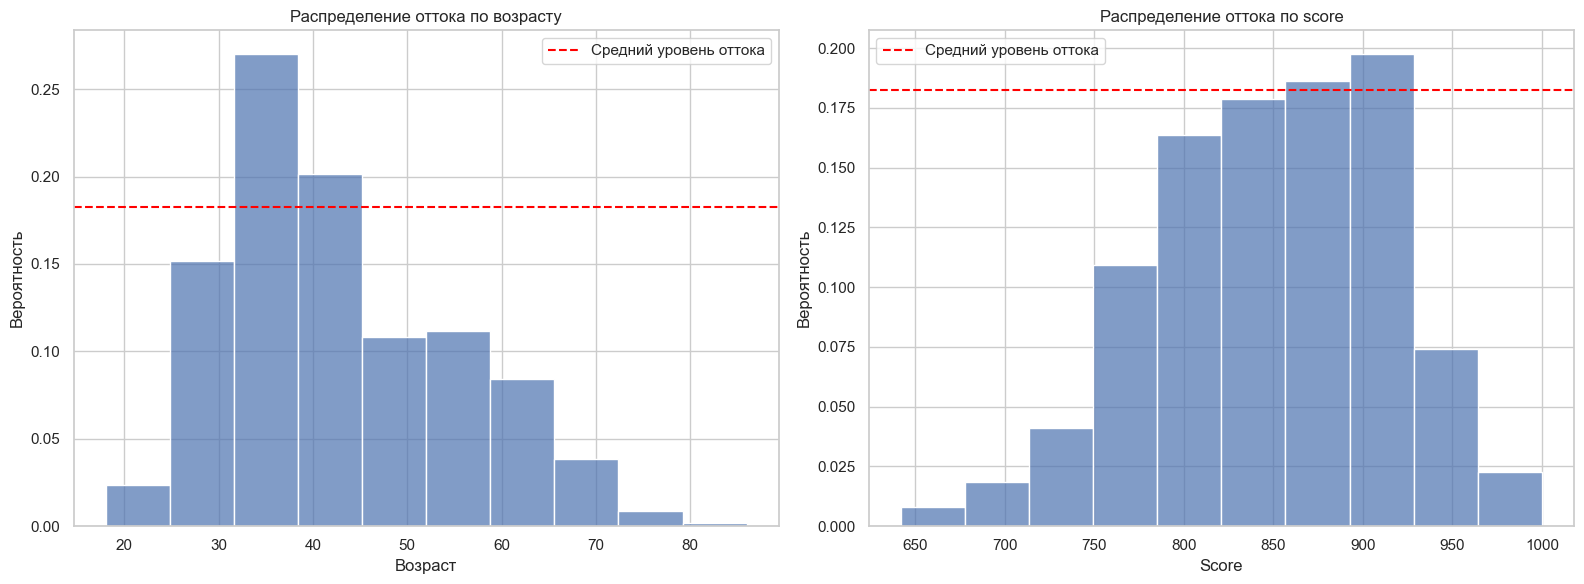

In [44]:
# Создаем фигуру для графиков
plt.figure(figsize=(16, 6))

# Гистограмма для 'age'
plt.subplot(1, 2, 1)  # Разбиваем на 1x2 графика
sns.histplot(data=df, x='age',  multiple='stack', bins=10, stat='probability', alpha=0.7)
plt.axhline(mean_churn, color='red', linestyle='--', label='Средний уровень оттока')
plt.title('Распределение оттока по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Вероятность')
plt.legend()

# Гистограмма для 'score'
plt.subplot(1, 2, 2)  # Разбиваем на 1x2 графика
sns.histplot(data=df, x='score', multiple='stack', bins=10, stat='probability', alpha=0.7)
plt.axhline(mean_churn, color='red', linestyle='--', label='Средний уровень оттока')
plt.title('Распределение оттока по score')
plt.xlabel('Score')
plt.ylabel('Вероятность')
plt.legend()

# Настраиваем внешний вид и показываем графики
plt.tight_layout()
plt.show()

Возрастная категория клиентво от 30-и до 45-и лет склонны уходить из банка: среднее значение оттока клиентов, входящих в этот диапозон выше среднего по банку. Взяв эту информацию и информацию предыдущего графика можно сказать что самый отточный возраст наблюдается с 30 по 35 лет.

Клиенты с кредитный скорингом от 850-и до 925-и баллов также имеют большую вероятность уйти из банка. Самые отточные с 850 до 925.

Эти выборки наиболее отточны, но довольно узки, поэтому при сегментации мы будем немного отклоняться от этих диапозонов.

Рассмотрим категориальный столбец 'city':

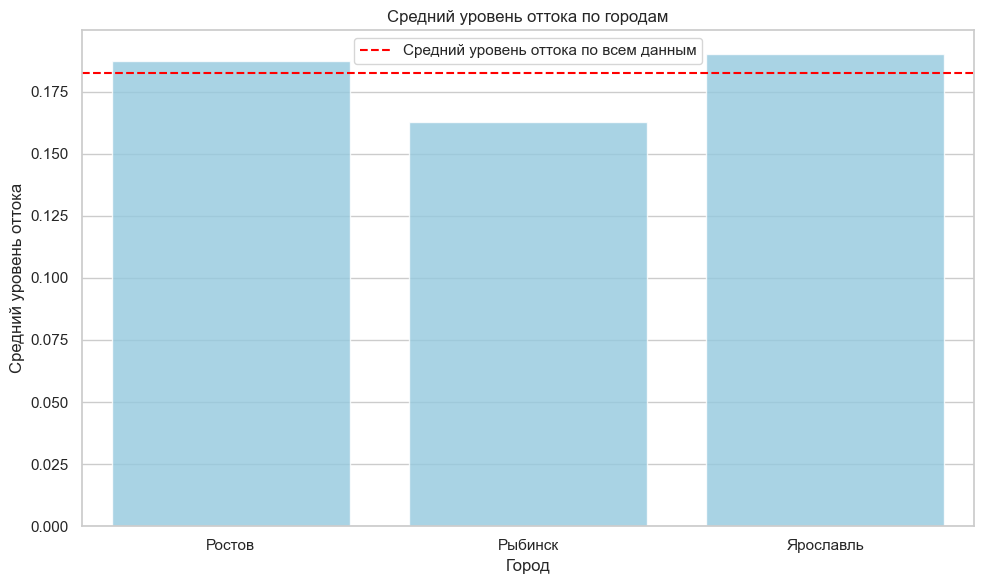

In [45]:
# Вычисляем средний уровень оттока в разрезе каждого города
city_churn_means = df.groupby('city')['churn'].mean().reset_index()

# Создаем фигуру для графика
plt.figure(figsize=(10, 6))

# Столбчатая диаграмма среднего оттока по каждому городу
sns.barplot(data=city_churn_means, x='city',  y='churn', color='skyblue', alpha=0.8)

# Добавляем линию для общего среднего уровня оттока
plt.axhline(mean_churn, color='red', linestyle='--', label='Средний уровень оттока по всем данным')

# Настройка графика
plt.title('Средний уровень оттока по городам')
plt.xlabel('Город')
plt.ylabel('Средний уровень оттока')
plt.legend()

# Показ графика
plt.tight_layout()
plt.show()

Клиенты из Ростова и Ярославля имеют средний уровень оттока выше, чем средний уровень по всем данным.

Рассмотрим категориальные - булевые величины: gender, credit_card, last_activity:

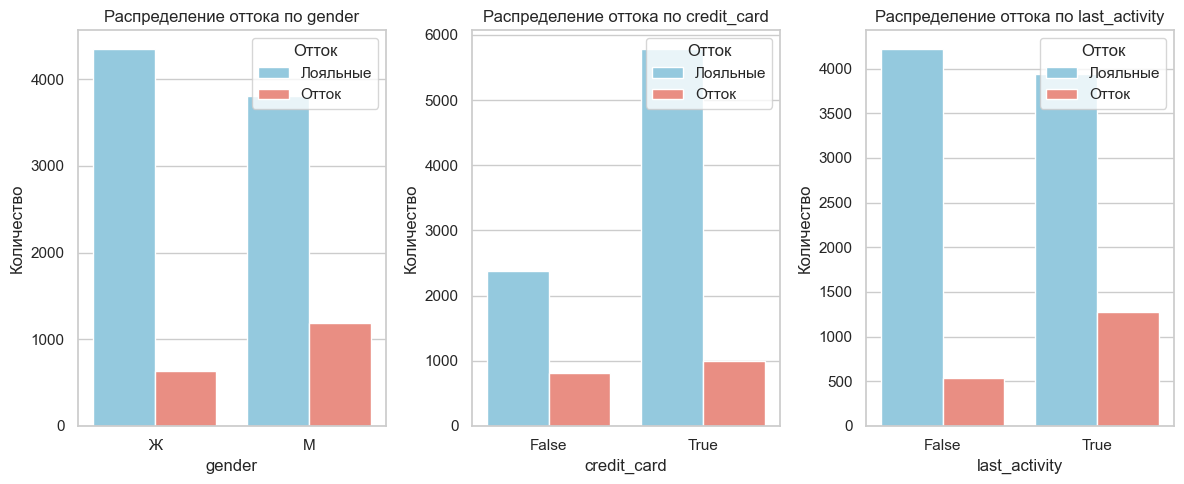

In [46]:
# Создаем список булевых атрибутов для анализа
bool_attributes = ['gender', 'credit_card', 'last_activity']

# Создаем фигуру для графиков
plt.figure(figsize=(12, 5))

# Цикл для построения визуализаций
for i, attribute in enumerate(bool_attributes):
    plt.subplot(1, 3, i + 1)  # Разбиваем на 1x3 графика
    
    # Построение столбчатой диаграммы с долями оттока и лояльных
    sns.countplot(data=df, x=attribute, hue='churn', palette={0: 'skyblue', 1: 'salmon'})
    
    # Настройка заголовков и меток осей
    plt.title(f'Распределение оттока по {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Количество')
    
    # Добавление легенды
    plt.legend(title='Отток', loc='upper right', labels=['Лояльные', 'Отток'])

# Настраиваем внешний вид и показываем графики
plt.tight_layout()
plt.show()

По булевым атрибутам преобладание оттока над лояльностью не найдено.

Анализ портретов клиентов в разрезе оттока: сущность этого этапа заключается в том, что мы конкретизируем предыдущий этап и получаем полноценную картину того, как выглядит 'типичный' клиент который обладает всем рядом признаков ушедшего клиента: т.е. находим клиентов к которым необходимо первоочерёдно применить меры, так как их уход многовероятен, а также составляем портрет самого обычного клиента банка и найдём позиции в его портрете в которых отток преобладает над лояльностью, чтобы также улучшить удержание клиентской базы.

Создадим сводную таблицу портрета типичного клиента банка, узнаем отток и лояльность по каждой позиции, а также отосительную разницу между ними. Таким образом, мы найдём отличительные черты среднего клиента с повышенным оттоком и сможем предположить что могло не понравится клиентам по их отличительным признакам (пример: допустим средний возраст клиента 30 лет и у нас в банке мало предложений для клиентов такого возраста, можно сделать специальные предложения для таких пользователей и др.). Также мы конкретизируем предыдущий этап EDA: составим собирательный портрет клиента, который имеет наивысший шанс уйти.

Собирательный (абстрактный) образ клиента с наивысшим шансом оттока:

- баланс: 0-50 тыс. у.е. или от 450 до 850 тыс. у.е.;
- заработная плата клиента от 100 до 180 тыс. у.е.;
- количество баллов собственности : от 3-х до 9-и (включительно);
- количество продуктов: от 3-х до 5-и (включительно);
- возрастная категория  от 30-и до 45-и лет;
- кредитный скоринг от 850-и до 925-и баллов;
- город Ростов или Ярославль.

Как это использовать?

Необходимо обратить внимание на каждый из этих пунктов и разработать идеи чтобы остановить повышенный отток.

Пример: Повышенный отток наблюдается у клиентов из Ростова и Ярославля, возможно, существуют какие-то неудобства с количеством отделений в этих городах или организации работы, времени работы. Рекомендации мы сформулируем в конечном выводе.

Составим портрет типичного клиента нашего банка с помощью сводной таблицы:

Определим наилучший вариант центральной тенденции для каждого из атрибутов:

- score — Среднее(т.к. оценка, ограниченная строгими пределами)
- city — Мода(категориальный атрибут)
- gender — Мода(категориальный атрибут)
- age — Медиана(не совсем нормально распределены данные)
- equity — Среднее(т.к. оценка, ограниченная строгими пределами)
- balance — Медиана(слишком большой разброс в данных)
- products — Медиана(не нормальное распределение)
- credit_card — Мода(категориальный атрибут)
- last_activity — Мода(категориальный атрибут)
- est_salary — Медиана(количественный атрибут, но слишком большой разброс в данных)

In [47]:
# Создаем пустой DataFrame для сводной таблицы
summary_table = pd.DataFrame(columns=['Атрибут', 'Центральная Тенденция'])

# Заполнение сводной таблицы для числовых атрибутов
numerical_attributes = {
    'score': 'mean',       # Среднее (оценка, ограниченная строгими пределами)
    'age': 'median',       # Медиана (не совсем нормально распределены данные)
    'equity': 'mean',      # Среднее (оценка, ограниченная строгими пределами)
    'balance': 'median',   # Медиана (слишком большой разброс в данных)
    'products': 'median',  # Медиана (не нормальное распределение)
    'est_salary': 'median' # Медиана (количественный атрибут, но слишком большой разброс в данных)
}

for attribute, measure in numerical_attributes.items():
    # Выбор меры центральной тенденции
    if measure == 'mean':
        tendency = df[attribute].mean()
    else:
        tendency = df[attribute].median()
    
    # Добавляем строку в таблицу с использованием pd.concat()
    new_row = pd.DataFrame({'Атрибут': [attribute], 'Центральная Тенденция': [round(tendency)]})
    summary_table = pd.concat([summary_table, new_row], ignore_index=True)

# Заполнение сводной таблицы для категориальных атрибутов
categorical_attributes = {
    'city': 'mode',           # Мода (категориальный атрибут)
    'gender': 'mode',         # Мода (категориальный атрибут)
    'credit_card': 'mode',    # Мода (категориальный атрибут)
    'last_activity': 'mode'   # Мода (категориальный атрибут)
}

for attribute, measure in categorical_attributes.items():
    # Выбор меры центральной тенденции
    if measure == 'mode':
        tendency = df[attribute].mode()[0]  # Получаем первую моду
    
    # Добавляем строку в таблицу с использованием pd.concat()
    new_row = pd.DataFrame({'Атрибут': [attribute], 'Центральная Тенденция': [tendency]})
    summary_table = pd.concat([summary_table, new_row], ignore_index=True)

# Вывод итоговой таблицы
display(summary_table)

Атрибут Центральная Тенденция
0          score                   849
1            age                    40
2         equity                     3
3        balance                524295
4       products                     2
5     est_salary                119627
6           city             Ярославль
7         gender                     М
8    credit_card                  True
9  last_activity                  True

In [48]:
for atr, tend, i in zip(summary_table['Атрибут'], summary_table['Центральная Тенденция'], range(len(summary_table))):
    # Если атрибут числовой, то используем интервал для фильтрации
    if atr == 'score':
        churn_ratio = df[(df['score'] >= tend - 10) & (df['score'] <= tend + 10)]['churn'].mean()
    elif atr == 'age':
        churn_ratio = df[(df['age'] >= tend - 1) & (df['age'] <= tend + 1)]['churn'].mean()
    elif atr == 'equity':
        churn_ratio = df[(df['equity'] >= tend - 1) & (df['equity'] <= tend + 1)]['churn'].mean()
    elif atr == 'balance':
        churn_ratio = df[(df['balance'] >= tend - 10000) & (df['balance'] <= tend + 10000)]['churn'].mean()
    elif atr == 'est_salary':
        churn_ratio = df[(df['est_salary'] >= tend - 5000) & (df['est_salary'] <= tend + 5000)]['churn'].mean()
    else:
        # Для категориальных атрибутов фильтрация по точному совпадению
        churn_ratio = df[df[atr] == tend]['churn'].mean()

    # Записываем значение в таблицу
    summary_table.loc[i, 'Доля оттока'] = round(churn_ratio, 2)
    summary_table.loc[i, 'Доля лояльности'] = 1 - round(churn_ratio, 2)
    summary_table.loc[i, 'Отношение'] = round(churn_ratio, 2) - (1 - round(churn_ratio, 2))

# Вывод сводной таблицы с обновленным столбцом 'churn_shape'
display(summary_table.sort_values(by='Доля оттока', ascending=False))

Атрибут Центральная Тенденция  Доля оттока  Доля лояльности  \
0          score                   849         0.24             0.76   
7         gender                     М         0.24             0.76   
9  last_activity                  True         0.24             0.76   
5     est_salary                119627         0.22             0.78   
2         equity                     3         0.21             0.79   
3        balance                524295         0.21             0.79   
4       products                     2         0.19             0.81   
6           city             Ярославль         0.19             0.81   
1            age                    40         0.16             0.84   
8    credit_card                  True         0.15             0.85   

   Отношение  
0      -0.52  
7      -0.52  
9      -0.52  
5      -0.56  
2      -0.58  
3      -0.58  
4      -0.62  
6      -0.62  
1      -0.68  
8      -0.70

Хочется уточнить что нам пришлось сделать субъективный диапозон для мер центральной тенденции, чтобы можно было отыскать записи, удовлетворяющие условию. 

Сводная таблица демонстрирует меры центральной тенденции каждого из атрибутов, вычислены доли оттока по которым следует принимать меры по разрешению проблемы.

Составим аналогично портреты лояльного и отточного клиентов:

Портрет отточного клиента:

1) Интервалы баланса:

- от 0 до 50-и тыс. у.е.;
- от 450-и до 850 тыс. у.е.

2) клиенты с доходом от 100 до 180 тыс. у.е.

3) количество баллов собственности : от 3-х до 9-и (включительно), практически линейный рост уровень оттока с увеличением баллов собственности (исключение - 8 баллов).

4) Количество продуктов: от 3-х до 5-и (включительно).

5) Возрастная категория клиентво от 30-и до 45-и лет.

6) Клиенты с кредитный скорингом от 850-и до 925-и баллов.

7) Клиенты из Ростова и Ярославля.

In [49]:
# Условия для анализа оттока по разным атрибутам
for atr, tend, i in zip(summary_table['Атрибут'], summary_table['Центральная Тенденция'], range(len(summary_table))):
    # Для атрибута "balance" рассматриваем два интервала
    if atr == 'balance':
        churn_ratio = df[((df['balance'] >= 0) & (df['balance'] <= 50000)) | ((df['balance'] >= 450000) & (df['balance'] <= 850000))]['churn'].mean()
    
    # Для "est_salary" клиенты с доходом от 100 до 180 тыс.
    elif atr == 'est_salary':
        churn_ratio = df[(df['est_salary'] >= 100000) & (df['est_salary'] <= 180000)]['churn'].mean()
    
    # Для "equity" клиенты с количеством баллов собственности от 3 до 9 (исключая 8)
    elif atr == 'equity':
        churn_ratio = df[(df['equity'] >= 3) & (df['equity'] <= 9) & (df['equity'] != 8)]['churn'].mean()

    # Для "products" клиенты с количеством продуктов от 3 до 5
    elif atr == 'products':
        churn_ratio = df[(df['products'] >= 3) & (df['products'] <= 5)]['churn'].mean()

    # Для "age" клиенты в возрасте от 30 до 45 лет
    elif atr == 'age':
        churn_ratio = df[(df['age'] >= 30) & (df['age'] <= 45)]['churn'].mean()

    # Для "score" клиенты с кредитным скорингом от 850 до 925 баллов
    elif atr == 'score':
        churn_ratio = df[(df['score'] >= 850) & (df['score'] <= 925)]['churn'].mean()

    # Для "город" клиенты из Ростова и Ярославля
    elif atr == 'город':
        churn_ratio = df[df['город'].isin(['Ростов', 'Ярославль'])]['churn'].mean()

    # Для остальных категориальных атрибутов (если это не числовой признак)
    else:
        churn_ratio = df[df[atr] == tend]['churn'].mean()

    # Записываем значение в таблицу
    summary_table.loc[i, 'Доля оттока'] = round(churn_ratio, 2)
    summary_table.loc[i, 'Доля лояльности'] = 1 - round(churn_ratio, 2)
    summary_table.loc[i, 'Отношение'] = round(churn_ratio, 2) - (1 - round(churn_ratio, 2))

# Вывод сводной таблицы с обновленным столбцом 'Доля оттока'
display(summary_table.sort_values(by='Доля оттока', ascending=False))

Атрибут Центральная Тенденция  Доля оттока  Доля лояльности  \
4       products                     2         0.40             0.60   
2         equity                     3         0.26             0.74   
0          score                   849         0.24             0.76   
7         gender                     М         0.24             0.76   
9  last_activity                  True         0.24             0.76   
3        balance                524295         0.21             0.79   
5     est_salary                119627         0.20             0.80   
6           city             Ярославль         0.19             0.81   
1            age                    40         0.17             0.83   
8    credit_card                  True         0.15             0.85   

   Отношение  
4      -0.20  
2      -0.48  
0      -0.52  
7      -0.52  
9      -0.52  
3      -0.58  
5      -0.60  
6      -0.62  
1      -0.66  
8      -0.70

Портрет лояльного клиента:

1) Интервалы баланса:

от 50 до 450-и тыс. у.е.; 

2) клиенты с доходом от 0 до 100 тыс. у.е. 

3) количество баллов собственности : до 3-х  (включительно)

4) Количество продуктов: от 1-го до 2-х (включительно). 

5) Возрастная категория клиентов от 45-и до 90-и лет, до 20-и

6) Клиенты с кредитный скорингом от 600-и до 800-и баллов, от 950 до 1000 

7) Клиенты из Рыбинска

In [50]:
# Условия для анализа лояльных клиентов
for atr, tend, i in zip(summary_table['Атрибут'], summary_table['Центральная Тенденция'], range(len(summary_table))):
    # Для атрибута "balance" клиенты с балансом от 50 до 450 тыс.
    if atr == 'balance':
        churn_ratio = df[(df['balance'] > 50000) & (df['balance'] < 450000)]['churn'].mean()
    
    # Для "est_salary" клиенты с доходом от 0 до 100 тыс.
    elif atr == 'est_salary':
        churn_ratio = df[(df['est_salary'] >= 0) & (df['est_salary'] <= 100000)]['churn'].mean()

    # Для "equity" клиенты с количеством баллов собственности до 3 (включительно)
    elif atr == 'equity':
        churn_ratio = df[(df['equity'] <= 3)]['churn'].mean()

    # Для "products" клиенты с количеством продуктов от 1 до 2 (включительно)
    elif atr == 'products':
        churn_ratio = df[(df['products'] >= 1) & (df['products'] <= 2)]['churn'].mean()

    # Для "age" клиенты в возрастных категориях до 20 или от 45 до 90 лет
    elif atr == 'age':
        churn_ratio = df[((df['age'] <= 20) | (df['age'] >= 45)) & (df['age'] <= 90)]['churn'].mean()

    # Для "score" клиенты с кредитным скорингом от 600 до 800 или от 950 до 1000 баллов
    elif atr == 'score':
        churn_ratio = df[((df['score'] >= 600) & (df['score'] <= 800)) | ((df['score'] >= 950) & (df['score'] <= 1000))]['churn'].mean()

    # Для "город" клиенты из Рыбинска
    elif atr == 'город':
        churn_ratio = df[df['город'] == 'Рыбинск']['churn'].mean()

    # Для остальных категориальных атрибутов (если это не числовой признак)
    else:
        churn_ratio = df[df[atr] == tend]['churn'].mean()

    # Записываем значение в таблицу
    summary_table.loc[i, 'Доля оттока'] = round(churn_ratio, 2)
    summary_table.loc[i, 'Доля лояльности'] = 1 - round(churn_ratio, 2)
    summary_table.loc[i, 'Отношение'] = round(churn_ratio, 2) - (1 - round(churn_ratio, 2))

# Вывод сводной таблицы с обновленным столбцом 'Доля оттока'
display(summary_table.sort_values(by='Доля оттока', ascending=False))

Атрибут Центральная Тенденция  Доля оттока  Доля лояльности  \
7         gender                     М         0.24             0.76   
9  last_activity                  True         0.24             0.76   
6           city             Ярославль         0.19             0.81   
1            age                    40         0.18             0.82   
3        balance                524295         0.16             0.84   
5     est_salary                119627         0.16             0.84   
8    credit_card                  True         0.15             0.85   
4       products                     2         0.14             0.86   
2         equity                     3         0.11             0.89   
0          score                   849         0.09             0.91   

   Отношение  
7      -0.52  
9      -0.52  
6      -0.62  
1      -0.64  
3      -0.68  
5      -0.68  
8      -0.70  
4      -0.72  
2      -0.78  
0      -0.82

Коррелляция. Исследовать нужно корреляцию всех признаков таблицы. Корреляцию можно анализировать попарно между всеми признаками, если хочется копнуть глубже, но важно сделать фокус на анализе корреляции признаков с признаком оттока.


Мы решили использовать phik-корреляцию, чтобы увидеть взаимосвязь не только в численных величинах, но и в категориальных, предварительно закодировав категориальные столбцы. Создадим матрицу корреляций и проинтерпритируем зависимости по шкале корреляции Чеддока:

In [51]:
# Вычисляем матрицу PhiK корреляций с указанием непрерывных признаков
phik_overview = df_encoded.phik_matrix(interval_cols = ['score', 'age', 'balance', 'est_salary'])

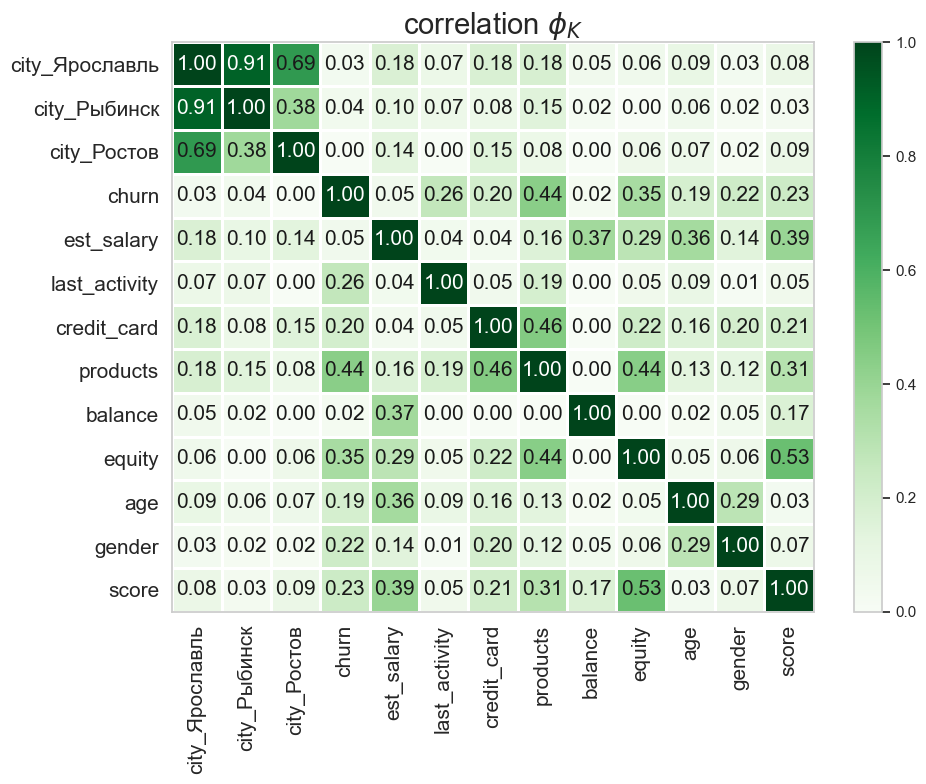

In [52]:
phik_overview.round(2)

churn_correlations = plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()
plt.show()

С матрицой корреляции можно ознакомиться, используя шкалу Чеддока:

- 0.0 - 0.2: Очень слабая корреляция
- 0.2 - 0.4: Слабая корреляция
- 0.4 - 0.6: Умеренная корреляция
- 0.6 - 0.8: Сильная корреляция
- 0.8 - 1.0: Очень сильная корреляция).

Оставим только нужную нам корреляцию для исследования (строка с атрибутом churn, исключаем churn), построим график:

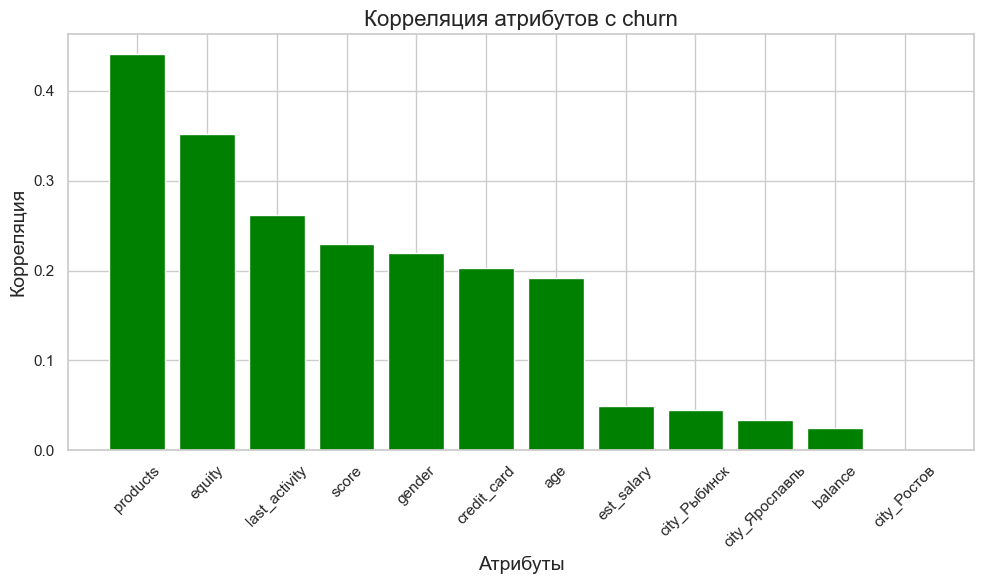

In [53]:
# Извлекаем корреляцию всех атрибутов с 'churn'
churn_correlations = phik_overview['churn'].drop('churn')  # Убираем сам churn из списка

# Сортируем значения по убыванию
sorted_churn_correlations = churn_correlations.sort_values(ascending=False)

# Создаем столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(sorted_churn_correlations.index, sorted_churn_correlations.values, color='green')

# Настройка заголовка и меток осей
plt.title('Корреляция атрибутов с churn', fontsize=16)
plt.xlabel('Атрибуты', fontsize=14)
plt.ylabel('Корреляция', fontsize=14)
plt.xticks(rotation=45)  # Поворачиваем метки на оси X для удобства чтения

# Показываем график
plt.tight_layout()
plt.show()

На основе шкалы Чеддока и представленной матрицы PhiK-корреляций, вот интерпретация наиболее сильных корреляций с оттоком:

- products (0.44): Умеренная корреляция. 
- equity (0.35): Слабая корреляция.
- last_activity (0.26): Слабая корреляция.
- score (0.23): Слабая корреляция.
- gender (0.22): Слабая корреляция.
- credit_card (0.20): Слабая корреляция.

**Промежуточный итог EDA:**

На данном этапе мы ознакомились с особенностями распределений величин в разрезе оттока, составили портрет типичного клиента и клиента который с наибольшей вероятностью покинет банк, а также проверили корреляцию между атрибутами, подробно изложим результаты после проверки гипотез.

## Проверка статистических гипотез
<a id="4"></a>

На данном этапе мы проверим 3 гипотезы:

- Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались;

- Доля ушедших клиентов имеющих один банковский продукт выше чем доля ушедших клиентов имеющих два и более  банковский продукта;

- Доля ушедших клиентов возрастом до 30 лет выше, чем доля ушедших клиентов старших возрастных категорий.

1) Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались:

 Нулевая гипотеза (H0): Средний доход клиентов, которые ушли, не отличается от среднего дохода клиентов, которые остались.
H0: средний доход ушедших = средний доход оставшихся.

 Альтернативная гипотеза (H1): Средний доход клиентов, которые ушли, отличается от среднего дохода клиентов, которые остались.
H1: средний доход ушедших ≠ средний доход оставшихся.

Типовая проблема в работе с данными - выбор статистического критерия.

Статистический критерий – это строгое математическое правило по которому принимается или отвергается та или иная гипотеза с известным уровнем значимости. Строгое в этом случае означает что конкретный статистический критерии корректно применять только в определённой ситуации.

80% задач покрываются следующими 5-ю видами ситуаций:
1)	Анализ различий между группами (сравнение статистической совокупности): 

Статистические критерии для анализа различий между группами:

Параметрические тесты:

• t-тест:
  * Одновыборочный: для сравнения среднего значения выборки с известным средним значением генеральной совокупности.
  * Двухвыборочный: для сравнения средних значений двух независимых выборок.
  * Парный: для сравнения средних значений двух зависимых выборок.

• ANOVA (дисперсионный анализ): 
  * Однофакторный: для сравнения средних значений двух или более групп по одному фактору.
  * Двухфакторный: для сравнения средних значений двух или более групп по двум или более факторам.

• Регрессионный анализ: для анализа зависимости между зависимой переменной и одной или несколькими независимыми переменными.

Непараметрические тесты:

• U-тест Манна-Уитни: для сравнения средних значений двух независимых выборок с ненормальным распределением.

• Тест Вилкоксона: для сравнения средних значений двух зависимых выборок с ненормальным распределением.
• Тест Краскела-Уоллиса: для сравнения средних значений двух или более групп по одному фактору с ненормальным распределением.

• Тест хи-квадрат: для сравнения частот в двух или более группах.

2)	Выявление взаимосвязей (статистическая взаимосвязь):
- коэффицент корреляции Пирсона;
-  коэффициент корреляции Спирмена;
- phick-корреляция.
3)	Прогнозы (регрессия(линейная/логическая), деревья, нейросети).
4)	Оценка динамических рядов.
5)	Кластерный анализ -  выделение групп со схожими признаками.

В нашем случае мы проводим анализ различий между группами (алгоритм), определяем следующее:

1.	Тип данных: количественные(непрерывные/дискретные), категориальные(номинальные, ранговые, булевые).
 
2.	Данные оказались количественными, тогда смотрим распределение:
- нормальное:
Используем параметрические тесты – тесты которые работают с нормальным распределением: более точные, но нужно чтобы было нормальное распределение как главное условие.
- НЕ нормальное:
Используем непараметрические тесты которые работают с не нормальным распределением: менее точные, но можно не выполнять условие – соблюдение нормального распределения.

3.	Связь между группами(присутствует/не присутствует):
Если объекты исследования в разных группах идентичны, то это связанные группы, а если нет, то не связанные соответсвенно.

4. Проверяем равенство дисперсий (в случае неравенства дисперсий или разнице в размере выборок более чем на 25% используется поправка Уэлча через настройку equal_var=False.

5.	Количество групп: выбираем количество и обращаемся к схеме для подборв критерия:


![image.png](поиск_критерия.png)

Для нашей гипотезы('est_salary' - исследуемая случайная величина):

1.	Тип данных: количественный - непрерывный, заработная плата может принимать бесконечное количество вариаций.

2. Данные оказались количественными, тогда смотрим распределение:

Проведём тест Шапиро-Уилка для проверки нормальности:

Нулевая гипотеза (H0): Распределение случайной величины 'est_salary' нормально распределено. 

Альтернативная гипотеза (H1): Распределение случайной величины 'est_salary' не нормально распределено.

In [54]:
sample_1 = df['est_salary']
alpha = 0.05  # критический уровень статистической значимости

# Выполнение теста Шапиро-Уилка
results = stats.shapiro(sample_1)  
p_value = results[1]  # Второе значение - p-value

print('p-значение: ', p_value)

# Интерпретация результата
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Также ознакомимся с распределением визуально:

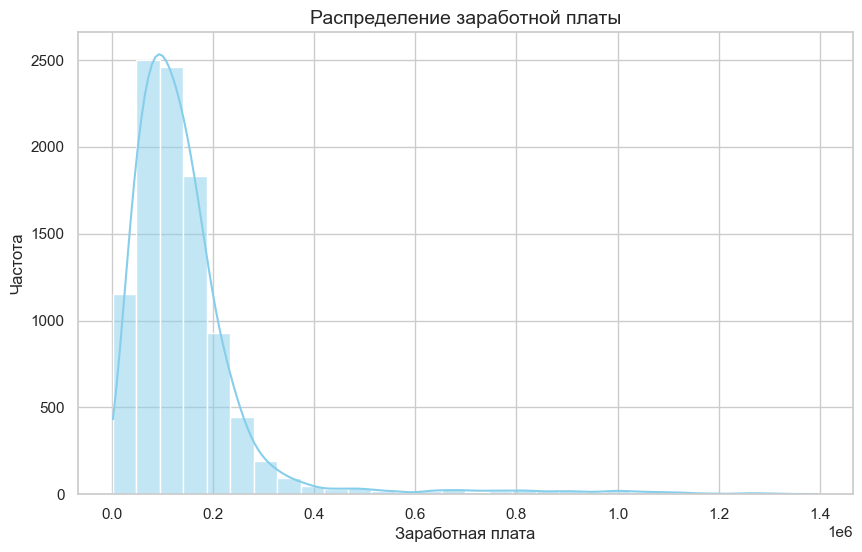

In [55]:
plt.figure(figsize=(10, 6))  # Задаем размер графика
sns.histplot(df['est_salary'], kde=True, bins=30, color='skyblue')  # Построение гистограммы и KDE

# Добавление заголовка и меток на русском языке
plt.title('Распределение заработной платы', fontsize=14)
plt.xlabel('Заработная плата')
plt.ylabel('Частота')

# Отображение графика
plt.show()

Распределение - НЕ нормальное, но необходимо ознакомиться с достаточностью данных для выбора стат. теста:

В силу ЦПТ в случае достаточности данных требование к нормальности распределения можно не учитывать - только из-за ненормальности распределения мы не можем отказываться от ttest

3.	Связь между группами(присутствует/не присутствует):
Если объекты исследования в разных группах идентичны, то это связанные группы, а если нет, то не связанные соответсвенно.

В нашем случае объекты исследования - это клиенты и они отличаются в разрезе групп, поэтому связь между группами отсутствует.

4. Проверяем равенство дисперсий (в случае неравенства дисперсий или разнице в размере выборок более чем на 25% используется поправка Уэлча через настройку equal_var=False.

Разделим клиентов на группы:

In [56]:
sample_1 = df.loc[df['churn'] == True] # ушедшие клиенты
sample_2 = df.loc[df['churn'] == False] # действующие клиенты

Узнаем разницу в размере выборок:

In [57]:
# Расчет соотношения размеров выборок и округление до 2 знаков
ratio = round(len(sample_1) / len(sample_2), 2)
print(f"Соотношение выборок (ушедшие/действующие): {ratio}")

Соотношение выборок (ушедшие/действующие): 0.22


Разница приемлима.

Проверим равенство дисперсий:

  Чтобы проверить равенство дисперсий двух групп по атрибуту est_salary, можно использовать тест Левена. Этот тест является популярным методом для проверки гомоскедастичности (равенства дисперсий) между двумя или более группами.
  
Нулевая гипотеза (H0): Дисперсии двух групп по атрибуту est_salary равны.

Альтернативная гипотеза (H1): Дисперсии двух групп по атрибуту est_salary не равны.

In [58]:
# Проверка равенства дисперсий с использованием теста Левена
stat, p_value = stats.levene(sample_1['est_salary'], sample_2['est_salary'])

# Вывод статистики и p-значения
print(f"Статистика теста Левена: {stat:.4f}, p-значение: {p_value:.4f}")

# Оценка по p-значению
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: дисперсии различны.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: дисперсии равны.")

Статистика теста Левена: 6.6340, p-значение: 0.0100
Отвергаем нулевую гипотезу: дисперсии различны.


Дисперсии различны, при этом разница размера выборок допустима, но околопредельна - используем поправка Уэлча через настройку equal_var=False при необходимости.

5.	Количество групп - 2 .

Какой статистический критерий нужно применить?

В данной ситуации необходимо использовать t-тест Стьюдента для независимых выборок: согласно нашему алгоритму подбора и схемы: распределение величины не нормальное, но количество объектов в каждой выборке более 30,  Дисперсии различны, при этом разница размера выборок допустима, но околопредельна - используем поправка Уэлча через настройку equal_var=False, но при этом мы удалим выбросы из каждой группы.

Используем функцию для очистки от выбросов:

In [59]:
def remove_outliers(df, column): # функция для очистки от выбросов по квартилям 
    # Вычисление первого (Q1) и третьего квартили (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Определение границ для выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Фильтрация данных без выбросов
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

Проверим:

In [60]:
# Удаление выбросов из sample_1 и sample_2
sample_1_cleaned = remove_outliers(sample_1, 'est_salary')
sample_2_cleaned = remove_outliers(sample_2, 'est_salary')

# Вывод результатов
print("Количество записей в sample_1 до удаления выбросов:", sample_1.shape[0])
print("Количество записей в sample_1 после удаления выбросов:", sample_1_cleaned.shape[0])

print("Количество записей в sample_2 до удаления выбросов:", sample_2.shape[0])
print("Количество записей в sample_2 после удаления выбросов:", sample_2_cleaned.shape[0])

Количество записей в sample_1 до удаления выбросов: 1819
Количество записей в sample_1 после удаления выбросов: 1737
Количество записей в sample_2 до удаления выбросов: 8155
Количество записей в sample_2 после удаления выбросов: 7761


Ещё раз проверим соотношение и равенство дисперсий:

In [61]:
# Расчет соотношения размеров выборок и округление до 2 знаков
ratio = round(len(sample_1) / len(sample_2), 2)
print(f"Соотношение выборок (ушедшие/действующие): {ratio}")

Соотношение выборок (ушедшие/действующие): 0.22


Чтобы проверить равенство дисперсий двух групп по атрибуту est_salary, можно использовать тест Левена. Этот тест является популярным методом для проверки гомоскедастичности (равенства дисперсий) между двумя или более группами.

Нулевая гипотеза (H0): Дисперсии двух групп по атрибуту est_salary равны.

Альтернативная гипотеза (H1): Дисперсии двух групп по атрибуту est_salary не равны.

In [62]:
# Проверка равенства дисперсий с использованием теста Левена
stat, p_value = stats.levene(sample_1['est_salary'], sample_2['est_salary'])

# Вывод статистики и p-значения
print(f"Статистика теста Левена: {stat:.4f}, p-значение: {p_value:.4f}")

# Оценка по p-значению
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: дисперсии различны.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: дисперсии равны.")

Статистика теста Левена: 6.6340, p-значение: 0.0100
Отвергаем нулевую гипотезу: дисперсии различны.


После очистки от выбросов всё осталось на таком же приемлимом уровне.

Применим статистический критерий (уровень стат. значимости берём в нашей работе всегда тривиальный - 0.05):

In [63]:
# Проведение t-теста для независимых выборок с поправкой Уэлча
stat, p_value = stats.ttest_ind(sample_1['est_salary'], sample_2['est_salary'], equal_var=False)

# Вывод результатов
alpha = 0.05
print(f"Статистика t-теста: {stat:.4f}, p-значение: {p_value:.4f}")

# Оценка по p-значению
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует значительное различие в доходах между ушедшими и оставшимися клиентами.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: значительных различий в доходах нет.")

Статистика t-теста: 0.1871, p-значение: 0.8516
Не удалось отвергнуть нулевую гипотезу: значительных различий в доходах нет.


Значительных различий в доходах между ушедшими и оставшимися клиентами не обнаружено, поэтому различия в этих группах являются не статистически значимыми.

Обший итог по проверке гипотезы : Значительных различий в доходах между ушедшими и оставшимися клиентами не обнаружено, поэтому различия в этих группах являются не статистически значимыми.

2) Доля ушедших клиентов имеющих один банковский продукт выше чем доля ушедших клиентов имеющих два и более  банковский продукта: 

Нулевая гипотеза (H0): Доля ушедших клиентов, имеющих один банковский продукт, равна или меньше доли ушедших клиентов, имеющих два и более банковских продукта.
  
Альтернативная гипотеза (H1): Доля ушедших клиентов, имеющих один банковский продукт, выше, чем доля ушедших клиентов, имеющих два и более банковских продукта.


Гипотеза возникла по такой банальной мысли: Если человек является клиентов многих банков, то при дифференциации необходимых ему продуктов между различными банками, одна проблема с единичным продуктом в нашем банке может вовсе оказаться причиной ухода из банка целиком. 

Найдём размеры групп:

In [64]:
print(f"{df[df['products'] == 1]['products'].count()} - размер группы с одним продуктом")

print(f"{df[df['products'] > 1]['products'].count()} - размер группы с  количеством продуктом больше одного")

3323 - размер группы с одним продуктом
6650 - размер группы с  количеством продуктом больше одного


Является распределние случайной величины нормальным ли:

In [65]:
sample_1 = df['products']
alpha = 0.05  # критический уровень статистической значимости

# Выполнение теста Шапиро-Уилка
results = stats.shapiro(sample_1)  
p_value = results[1]  # Второе значение - p-value

print('p-значение: ', p_value)

# Интерпретация результата
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Особенности данных которые необходимо учитывать при подборе теста:

- размеры выборки отличаются примерно в 2 раза: 3323 - размер группы с одним продуктом
6650 - размер группы с  количеством продуктом больше одного, не сильно важно для сравнения долей;
- распределение признака количества продуктов является не нормальным;
- объём выборки в каждой группе составляет более 3000, что является достаточным

Используем непараметрический тест Хи-квадрат, так как распределение не нормальное и число объектов достаточное:

In [66]:
# Подсчет количества клиентов в каждой группе
count_1_product = df[df['products'] == 1].shape[0]  # Всего с 1 продуктом
count_2_or_more_products = df[df['products'] > 1].shape[0]  # Всего с более чем 1 продуктом

# Подсчет ушедших клиентов
churn_count_1_product = df[(df['products'] == 1) & (df['churn'] == True)].shape[0]
churn_count_2_or_more_products = df[(df['products'] > 1) & (df['churn'] == True)].shape[0]

# Создание  таблицы
contingency_table = pd.DataFrame({
    'Ушедшие': [churn_count_1_product, churn_count_2_or_more_products],
    'Оставшиеся': [count_1_product - churn_count_1_product, count_2_or_more_products - churn_count_2_or_more_products]
}, index=['1 продукт', '2 и более продуктов'])

# Проведение теста хи-квадрат
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Вывод результатов
alpha = 0.05
print(f"Статистика теста хи-квадрат: {chi2_stat:.4f}, p-значение: {p_value:.4f}")
print(f"Степени свободы: {dof}")
print(f"Ожидаемые частоты:\n{expected}")

# Оценка по p-значению
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует значительное различие в долях между ушедшими и оставшимися клиентами.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: значительных различий в долях нет.")

Статистика теста хи-квадрат: 415.0630, p-значение: 0.0000
Степени свободы: 1
Ожидаемые частоты:
[[ 605.75694375 2717.24305625]
 [1212.24305625 5437.75694375]]
Отвергаем нулевую гипотезу: существует значительное различие в долях между ушедшими и оставшимися клиентами.


In [67]:
print(round(churn_count_1_product / count_1_product, 2), '- доля ушедших клиентов с одним продуктом')
print(round(churn_count_2_or_more_products / count_2_or_more_products, 2), '- доля ушедших клиентов с 2-я и более продуктами')

0.07 - доля ушедших клиентов с одним продуктом
0.24 - доля ушедших клиентов с 2-я и более продуктами


Различия в долях оказались статистически значимыми: примерно на 17% доля ушедших больше у выборки с клинтами у которых 2 и более продукта. Выводы оказались весьма контринтуитивными, что полезно для нашего исследования.

3) Доля ушедших клиентов возрастом до 30 лет выше, чем доля ушедших клиентов старших возрастных категорий:

Нулевая гипотеза (H0): Доля ушедших клиентов возрастом до 30 лет не выше, чем доля ушедших клиентов старших возрастных категорий.
  
Альтернативная гипотеза (H1): Доля ушедших клиентов возрастом до 30 лет выше, чем доля ушедших клиентов старших возрастных категорий.

Данную гипотезу можно также проверить критерием хи-квадрат или Z-тестом для пропорций, после ознакомления с данными и выявления особенностей в них уже точно определимся какой тест мы будем применять, также зафиксируем причины выбора того или иного варианта.

Найдём размеры групп:

In [68]:
print(f"{df[df['age'] < 30]['age'].count()} - размер группы клиентов до 30-и лет")

print(f"{df[df['age'] >= 30]['age'].count()} - размер группы клиентов за 30-ть лет")

1148 - размер группы клиентов до 30-и лет
8826 - размер группы клиентов за 30-ть лет


Является распределние случайной величины нормальным ли:

In [69]:
sample_1 = df['age']
alpha = 0.05  # критический уровень статистической значимости

# Выполнение теста Шапиро-Уилка
results = stats.shapiro(sample_1)  
p_value = results[1]  # Второе значение - p-value

print('p-значение: ', p_value)

# Интерпретация результата
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Аналогичные особенности как в прошлом тесте, применяем Хи-квадрат:

In [70]:
# Подсчет клиентов в каждой возрастной группе
count_under_30 = df[df['age'] < 30].shape[0]  # Всего клиентов до 30 лет
count_30_and_older = df[df['age'] >= 30].shape[0]  # Всего клиентов 30 лет и старше

# Подсчет ушедших клиентов в каждой группе
churn_under_30 = df[(df['age'] < 30) & (df['churn'] == True)].shape[0]  # Ушедшие клиенты до 30 лет
churn_30_and_older = df[(df['age'] >= 30) & (df['churn'] == True)].shape[0]  # Ушедшие клиенты 30 лет и старше

# Создание таблицы для теста хи-квадрат
contingency_table = pd.DataFrame({
    'Ушедшие': [churn_under_30, churn_30_and_older],
    'Оставшиеся': [count_under_30 - churn_under_30, count_30_and_older - churn_30_and_older]
}, index=['До 30 лет', '30 лет и старше'])

# Проведение теста хи-квадрат
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Вывод результатов
alpha = 0.05
print(f"Статистика теста хи-квадрат: {chi2_stat:.4f}, p-значение: {p_value:.4f}")
print(f"Степени свободы: {dof}")
print(f"Ожидаемые частоты:\n{expected}")

# Оценка по p-значению
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: доля ушедших клиентов возрастом до 30 лет выше, чем доля ушедших клиентов старших возрастных категорий.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: доля ушедших клиентов возрастом до 30 лет не выше, чем доля ушедших клиентов старших возрастных категорий.")

Статистика теста хи-квадрат: 19.3461, p-значение: 0.0000
Степени свободы: 1
Ожидаемые частоты:
[[ 209.36555043  938.63444957]
 [1609.63444957 7216.36555043]]
Отвергаем нулевую гипотезу: доля ушедших клиентов возрастом до 30 лет выше, чем доля ушедших клиентов старших возрастных категорий.


Различия в долях групп клиентов по возрасту не является статистически значимым.

## Подведение первого масштабного промежуточного итога - выводы по результатам EDA, корреляционного анализа и гипотез, выделение признаков, влияющих на отток
<a id="5"></a>

**EDA:**

 Повышенный отток наблюдается в следующих позициях:
 
1) Интервалы баланса:

- от 0 до 50-и тыс. у.е.;
- от 450-и до 850 тыс. у.е.

2) клиенты с доходом от 100 до 180 тыс. у.е.

3) количество баллов собственности : от 3-х до 9-и (включительно), практически линейный рост уровень оттока с увеличением баллов собственности (исключение - 8 баллов).

4) Количество продуктов: от 3-х до 5-и (включительно).

5) Возрастная категория клиентво от 30-и до 45-и лет.

6) Клиенты с кредитный скорингом от 850-и до 925-и баллов.

7) Клиенты из Ростова и Ярославля.

Совокупность всех этих позиций является портретом клиента с наивысшим шансом уйти.

**С портретом типичного клиента мы знакомы (напомню что значения долей собирались с данных которые по центральной тенденции примерно такие же как в таблице(различия не превышают 3%) - вынужденная мера возникшая из-за малого объёма данных), конкретизируем самое важное из неё с помошью визуализации, а именно долю оттока по каждому атрибуту:**

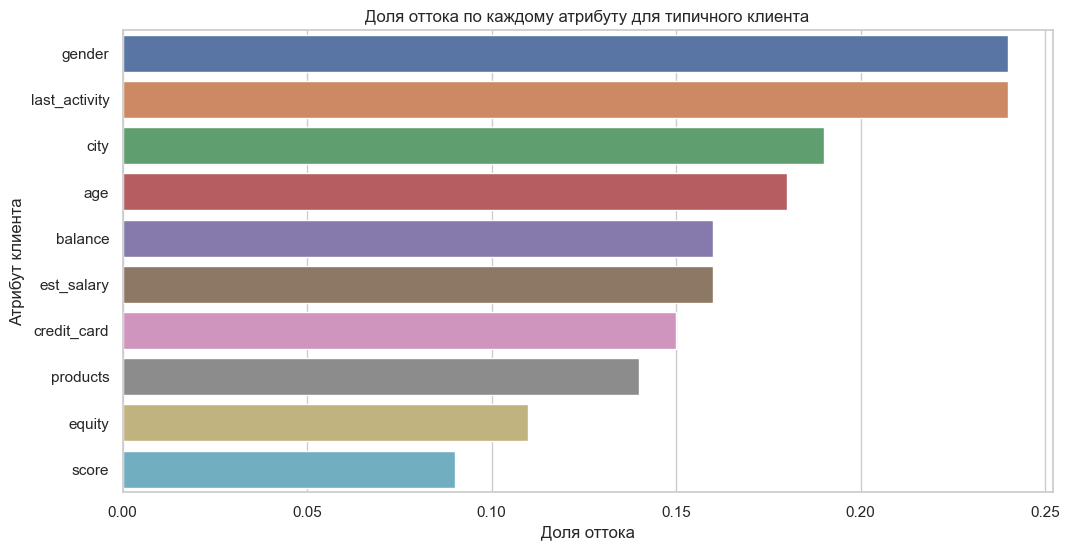

In [71]:
typical_client_pivot = summary_table.sort_values(by='Доля оттока', ascending=False)

# Создание фигуры и осей
plt.figure(figsize=(12, 6))

# Построение горизонтальной столбчатой диаграммы
sns.barplot(
    x=typical_client_pivot['Доля оттока'], 
    y=typical_client_pivot['Атрибут'] # Индексы для отображения категорий
)

# Добавление заголовка и меток осей
plt.title("Доля оттока по каждому атрибуту для типичного клиента")
plt.xlabel("Доля оттока")
plt.ylabel("Атрибут клиента")

plt.show()

Наивысший отток по атрибутам для типичного клиента наблюдается в 3-х атрибутах:

- 'score';
- 'gender';
- 'last_activity'.

Если мы хотим улучшить ситуацию с оттоком типичных клиентов, то первоочерёдно будем работать с этими атрибутами.

**Корреляционный анализ:**

На основе шкалы Чеддока и представленной матрицы PhiK-корреляций, вот интерпретация наиболее сильных корреляций с оттоком:

- last_activity (0.26): Слабая корреляция.
 Клиенты с более высокой активностью имеют небольшую тенденцию к оставлению компании. Это может говорить о том, что активные пользователи в среднем реже уходят.
 
- products (0.44):
 Умеренная корреляция.
Это говорит о том, что количество продуктов, которыми пользуются клиенты, оказывает более ощутимое влияние на их вероятность остаться. Чем больше продуктов у клиента, тем ниже вероятность его оттока.

- balance (0.26):
 Слабая корреляция.
Клиенты с более высоким балансом на счете имеют слабую склонность оставаться в компании. Это говорит о том, что высокий баланс немного снижает вероятность оттока.

- equity (0.44):
 Умеренная корреляция.
Наличие активов (equity) оказывает умеренное влияние на удержание клиентов. Чем больше активов у клиента, тем меньше вероятность его ухода.

**Результаты проверки гипотез:**

1) Значительных различий в доходах между ушедшими и оставшимися клиентами не обнаружено, поэтому различия в этих группах являются не статистически значимыми.

2) Различия в долях клиентов с одним продуктом и клиентов у которых более одного продукта оказались статистически значимыми: примерно на 17% доля ушедших больше у выборки с клиентами у которых 2 и более продукта. 

3) Различия в долях оттока групп клиентов до 30-и лет и после 30-и  не является статистически значимым.

## Сегментация
<a id="6"></a>

**Нам нужно найти неузкие сегменты: от 500 клиентов на сегмент; не менее трёх; отток выше, чем средний уровень оттока по банку:**

Найдём средний уровень оттока по банку:

In [72]:
print(round(df['churn'].mean(), 3), '- средний уровень оттока по банку')

0.182 - средний уровень оттока по банку


Выделим 3 отточных сегмента которые основываются преимущественно на типичном портрете клиента, рискованном портрете и корреляционном анализе: 

- 1-й сегмент: основан на особенностях типичного клиента;
- 2-й сегмент: основан на особенностях рискованного клиента;
- 3-й сегмент: основан на особенностях корреляционного анализа.

Постараемся сделать их максимально широкими и при этом достаточно целевыми.

1-й сегмент: Наивысший отток по атрибутам для типичного клиента наблюдается в 4-х атрибутах и составляет 0.24-0.22:

- 'score';
- 'gender';
- 'last_activity';
- 'est_salary'.

Мы бы могли в рассмотрение взять больше атрибутов, но мы хотим составить довольно широкие сегменты, поэтому 4-х с наиболее высоким уровнем оттока вполне достаточно.

In [73]:
typical_client_pivot[:4]

Атрибут Центральная Тенденция  Доля оттока  Доля лояльности  \
7         gender                     М         0.24             0.76   
9  last_activity                  True         0.24             0.76   
6           city             Ярославль         0.19             0.81   
1            age                    40         0.18             0.82   

   Отношение  
7      -0.52  
9      -0.52  
6      -0.62  
1      -0.64

Меры центральной тенденции немного 'размоем' - сделаем интервалы центральных тенденций, в сегмент попадут пользователи у которых:

- score: от 800 до 900;
- gender: 1 (мужчины);
- last_activity - True;
- est_salary: 80000-160000.

Найдём таких клиентов, их количество, средний уровень оттока:

In [74]:
first_segment = df.loc[
    (df['score'] >= 800) & (df['score'] <= 900) &  # Фильтр по score
    (df['gender'] == 'М') &                         # Фильтр по gender (1 - мужчины)
    (df['last_activity'] == True) &               # Фильтр по активности
    (df['est_salary'] >= 80000) & (df['est_salary'] <= 160000)  # Фильтр по зарплате
] # ищем клиентов 1-го сегмента

Проверяем находит ли по датафрейму более 500 таких клиентов:

In [75]:
len(first_segment)

539

Найдём средний уровень оттока такого сегмента:

In [76]:
print(round(first_segment['churn'].mean(), 3), '- средний уровень оттока по банку')

0.438 - средний уровень оттока по банку


Средний уровень оттока такого сегмента почти 44%: это больше среднего оттока по банку более чем в 2 раза, 1-й сегмент найден.

2-й сегмент: Если мы попробуем собрать все отличительные черты уходящего клиента, то записей получится очень мало, поэтому наберём наиболее оптимальные особенности и немного подредактируем границы чтобы набиралось нужное по условие количество клиентов:

В выборку попали клиенты, соответствующие следующим критериям:

- Баланс: от 0 до 850,000 у.е.
- Количество баллов собственности: от 5 до 9 .
- Количество продуктов: от 2 до 5.
- Возраст: от 25 до 45 лет.
- Кредитный скоринг: от 700 до 950 баллов.

In [77]:
# Фильтрация клиентов по обновленным условиям (без условия на доход)
second_segment = df[
    (df['balance'] >= 0) & (df['balance'] <= 850000) &  # Баланс от 0 до 850 тыс. у.е.
    (df['equity'] >= 5) & (df['equity'] <= 9) &    # Количество баллов собственности от 5 до 9 (исключая 8)
    (df['products'] >= 2) & (df['products'] <= 5) &  # Количество продуктов от 2 до 5 (включительно)
    (df['age'] >= 25) & (df['age'] <= 45) &  # Возраст от 30 до 45 лет
    (df['score'] >= 700) & (df['score'] <= 950)  # Кредитный скоринг от 700 до 950 баллов
]

# Вывод результата
print(len(second_segment))

637


In [78]:
print(round(second_segment['churn'].mean(), 3), '- средний уровень оттока по банку')

0.267 - средний уровень оттока по банку


Средний уровень оттока данного сегмента выше среднего по банку примерно на 8-9%, количество записей свыше 500, второй сегмент найден.

3-й сегмент: Берём 2 фактора которые имеют наибольшую корреляцию с оттоком - продукты и активы:

In [79]:
# Определение пороговых значений для фильтрации с использованием медиан
median_products = df['products'].median()  # Медиана количества продуктов
median_equity = df['equity'].median()  # Медиана значения активов

# Фильтрация клиентов с высоким уровнем оттока
high_churn_risk_clients = df[
    (df['products'] > median_products) &  # продуктов больше медианного значения
    (df['equity'] > median_equity)  # аналогично
]

# Вывод количества таких клиентов
print(len(high_churn_risk_clients))

952


In [80]:
print(round(high_churn_risk_clients['churn'].mean(), 3), '- средний уровень оттока по банку')

0.447 - средний уровень оттока по банку


Этот сегмент также удовлетворяет всем условиям, найден.

## Приоритизация сегментов
<a id="7"></a>

Поскольку сегментов у нас немного и они довольно сильно отличаются по количеству клиентов и уровню оттока, то можно без какого-то сложного алгоритма приотизировать их:

Приоритизация получилась следующая (от первой необходимости):

- 3-й сегмент (основан на корреляционном анализе): под его условия подходит 952 клиента, уровень оттока 44.7%, он подразумевает что количество баллов собственности у клиентов выше медианного по банку и наличие количества продуктов больше медианного по банку;
- 1-й сегмент (основан на особенностях типичного клиента): под его условия подходит 539 клиента, уровень оттока 44%, он подразумевает такие условия клиента:
  - score: от 800 до 900;
  - gender: 1 (мужчины);
  - last_activity - True;
  - est_salary: 80000-160000.
- 2-й сегмент (основан на особенностях рискованного клиента): под его условия подходит 637 клиента, уровень оттока 26-27%, под него попадут клиенты со следующими особенностями:
  - Баланс: от 0 до 850,000 у.е.
  - Количество баллов собственности: от 5 до 9 .
  - Количество продуктов: от 2 до 5.
  - Возраст: от 25 до 45 лет.
  - Кредитный скоринг: от 700 до 950 баллов.

Такая иерархия получилась потому что:
- 3-ий сегмент абсолютный лидер по показателям;
- 1-ий сегмент имеет уровень оттока примерно как у 3-го, но совсем немного уступает 2-му по клиентам.

Это всё получилось без подсчётов, но можно было найти количество отточных клиентов в каждом сегменте и сравнить их, получилась бы такая же иерархия.

## Формирование рекомендаций (таргетированных) по работе с каждым сегментом
<a id="8"></a>

- 3-й сегмент (основан на корреляционном анализе): он подразумевает что количество баллов собственности у клиентов выше медианного по банку и наличие количества продуктов больше медианного по банку.

Рекомендации:

- Премиальные инвестиционные услуги: клиенты с высоким количеством баллов собственности, как правило, обладают значительными активами. Рекомендуется предложить им эксклюзивные программы управления капиталом, доступ к премиальным инвестиционным продуктам.
- создать программу защиты активов:разработать предложения по страхованию крупных активов или внедрить новые программы по защите имущества. Это может включать страхование недвижимости, авто или других значимых активов клиента.
- предложить VIP-обслуживание для клиентов с высоким количеством продуктов и активов: возможность оформить карту с экслюзивным дизайном, небольшие подарки в виде мерча банка при открытии нового продукта. Можно прозвонить таких клиентов с помощью голосового помошника (бота) и проинформировать про персонализированные предложения.

1-й сегмент (основан на особенностях типичного клиента):  он подразумевает такие условия клиента:
- Баллы кредитного скоринга: от 800 до 900;
- Пол: 1 (мужчины);
- Активный клиент - True;
- Доход: 80000-160000.

Узнаем медианный возраст таких клиентов:

In [81]:
first_segment['age'].median()

37.0

1-й сегмент клиентов - активных клиентов банка, мужского пола, зрелого возраста, с доходом от 80000 до 160000 у.е.:

Рекомендации:
- найти поставщика топлива и установить с ним сотрудничество: мы будем рекламировать его сеть заправок у себя в приложении, а он в свою очередь создаст возможность экономить клиентам при оплате продуктами нашего банка, квота клиентов будет ограничена и условия рекламирования тоже, поэтому первоочерёдно мы предоставим возможность экономить клиентам данного сегмента;

- сделать полезные категории кэшбека: супермаркеты, тренажёрные залы, охота и рыбалка, автомобильные запчасти, инструменты;

- создать  льготную комиссию на инвестиции;

- 2 раза в месяц предоставлять кэшбек 50-80% на какие-то недорогие товары у партнёров: бритвы, шампуни и др.

2-й сегмент (основан на особенностях рискованного клиента):  под него попадут клиенты со следующими особенностями:
  - Баланс: от 0 до 850,000 у.е.
  - Количество баллов собственности: от 5 до 9 .
  - Количество продуктов: от 2 до 5.
  - Возраст: от 25 до 45 лет.
  - Кредитный скоринг: от 700 до 950 баллов.
  
Рекомендации:

- предложить перейти на наш банк как основной, т.е. чтобы заработная плата данным клиентам приходила на наши продукты за приемлимый для нас бонус;

- создать многоуровневые предложения для продуктов: поскольку клиенты имеют 2–5 продуктов, банк может стимулировать их к использованию дополнительных продуктов (например, инвестиционных счетов, страховых полисов, брокерских услуг), так клиенту будет сложнее отказаться от наших услуг;

- создать выгодные пакеты услуг: ввести пакетные предложения, которые объединяют несколько финансовых продуктов с выгодными условиями (например, скидки на обслуживание, кешбэки, привилегированные условия по кредитам).